# Auswertung zum Versuch: Röntgenstrahlung
## Fortgeschrittenen Prakitkum, Sommersemester 2025
## Universität Innsbruck
### Zarah Aigner

## Aufgabe 1: Zählrohrcharakteristik

Importieren der benötigten Bibliotheken und Einbindung von Latex für die Beschriftung des Fits.

In [11]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import configparser
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import pandas as pd
from scipy.constants import e, c, h, nano
from scipy.signal import find_peaks

plt.rcParams['text.usetex'] = True #LaTeX

Zur Bestimmung wird die Zählrate gegen die verschiedenen Zählrohrspannungen aufgetragen, für die Unsicherheiten gehe ich von einer Poisson Verteilung aus. Dann wird noch ein Fit drangelegt.

In [12]:
%matplotlib inline


Einlesen der Werte, Plotten und Fitten

Konstanter Fit im Plateau: a = 1411 ± 7


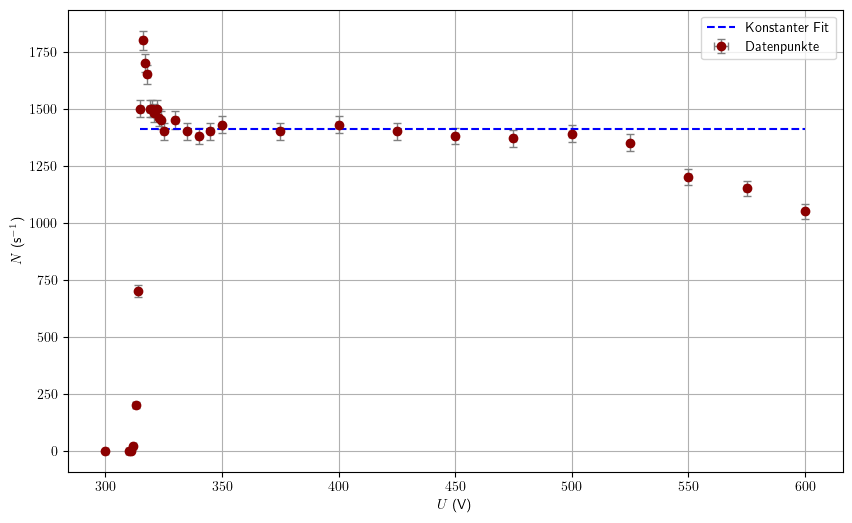

In [421]:
U = np.array([
    300, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
    330, 335, 340, 345, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600
])

Count = np.array([
    0, 0, 0, 20, 200, 700, 1500, 1800, 1700, 1650, 1500, 1500, 1480, 1500,
    1460, 1450, 1400, 1450, 1400, 1380, 1400, 1430, 1400, 1430, 1400,
    1380, 1370, 1390, 1350, 1200, 1150, 1050
])

Count_error = np.sqrt(Count) #Poisson Verteilung -> Fehler mit der Wurzel berechnen
U_error = np.ones(32) #Unsicherheit SPannung +- 1 V

# Intervall für Fit wählen
mask = (U >= 315) & (U <= 600)
U_plateau = U[mask]
Count_plateau = Count[mask]
Count_error_plateau = Count_error[mask]

# konstanter Fit
def const_fit(U, a):
    return a * np.ones_like(U)

# fitten
popt, pcov = curve_fit(const_fit, U_plateau, Count_plateau, sigma=Count_error_plateau, absolute_sigma=True)
a = popt[0]
a_err = np.sqrt(pcov[0][0])

# Ausgabe der Fit-Parameter
print(f"Konstanter Fit im Plateau: a = {a:.0f} ± {a_err:.0f}")

# Plotten der Daten und des Fits
plt.figure(figsize=(10, 6))
plt.errorbar(U, Count, xerr=U_error, yerr=Count_error, fmt='o', color='darkred', 
             ecolor='gray', elinewidth=1, capsize=3, label="Datenpunkte")
plt.hlines(a, xmin=min(U_plateau), xmax=max(U_plateau), color='blue',
           label=f"Konstanter Fit", linestyles='--')
plt.xlabel("$U$ (V)")
plt.ylabel("$N$ (s$^{-1}$)")
plt.grid(True)
plt.legend()
plt.show()


## Aufgabe 2: Charakteristische Röntgenstrahlung

importieren der Dateien

In [ ]:
data = np.loadtxt("Versuch2.txt", skiprows=3)

angle = data[:, 0]
count_2 = data[:, 1]
count_2_error = np.sqrt(count_2) #Unsicherheit aufgrund Poisson Statistik

Implementierung der Funktion welche den Winkel in Wellenlänge umrechnet mithilfe des Bragg-Gesetzes -> Formel siehe Skript

In [63]:
def bragg_winkel_to_wavelength(theta, d, n=1):
    """
    Calulates λ out of θ.

    Parameters:
    - theta: Bragg-Winkel in degree
    - d: distance in nm
    - n: order, in our case 1

    Return:
    - λ in nm
    """
    theta_rad = np.radians(theta)
    lam = (2 * d * np.sin(theta_rad)) / n
    return lam


Berechnung von d eines LiF Kristalls -> Formel siehe Skript

In [64]:
M_LiF = 25.938 #molare Masse in g/mol
rho = 2.635 #Dichte in g/cm^3
N_A = 6.022e23 #avogadro Konstante

d_LiF = (M_LiF / (rho * N_A * 2)) ** (1/3) * 1e7 #nm
print(d_LiF)

0.2014319574920211


Berechnung der WInkel in Wellenlänge

In [65]:
wavelengths = bragg_winkel_to_wavelength(angle, d_LiF)
wavelengths_PM = wavelengths * 1000

Nun werden die Daten geplottet und die peaks mittels find_peaks von scipy berechnet 

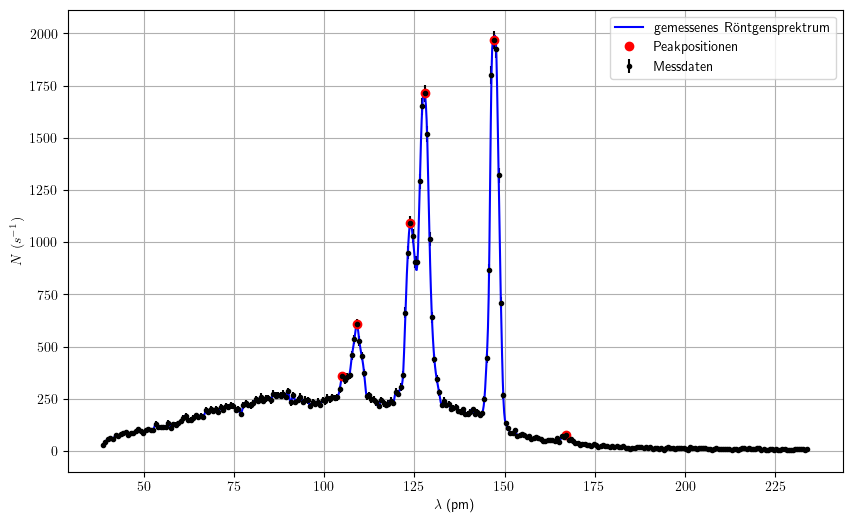

Gefundene Peak-Positionen mit Unsicherheiten:
Peak 1: Wellenlänge = 104.95 pm, Zählrate = 358.00 ± 18.92 s⁻¹
Peak 2: Wellenlänge = 109.02 pm, Zählrate = 607.00 ± 24.64 s⁻¹
Peak 3: Wellenlänge = 123.82 pm, Zählrate = 1094.00 ± 33.08 s⁻¹
Peak 4: Wellenlänge = 127.83 pm, Zählrate = 1713.00 ± 41.39 s⁻¹
Peak 5: Wellenlänge = 147.00 pm, Zählrate = 1969.00 ± 44.37 s⁻¹
Peak 6: Wellenlänge = 167.06 pm, Zählrate = 76.00 ± 8.72 s⁻¹
Gefundene Peak-Positionen mit Fehlern:
Peak 1: λ = 104.95 ± 0.33 pm, N = 358.00 ± 18.92 s⁻¹
Peak 2: λ = 109.02 ± 0.33 pm, N = 607.00 ± 24.64 s⁻¹
Peak 3: λ = 123.82 ± 0.33 pm, N = 1094.00 ± 33.08 s⁻¹
Peak 4: λ = 127.83 ± 0.33 pm, N = 1713.00 ± 41.39 s⁻¹
Peak 5: λ = 147.00 ± 0.33 pm, N = 1969.00 ± 44.37 s⁻¹
Peak 6: λ = 167.06 ± 0.33 pm, N = 76.00 ± 8.72 s⁻¹


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import make_interp_spline


# Intervallgrenzen für Peak-Suche
intervalle = [
    (100, 108),
    (108, 115),
    (115, 125),
    (125, 135),
    (135, 155),
    (155, 175)
]

peak_x = []
peak_y = []

# Für jedes Intervall Peak suchen und speichern
for start, end in intervalle:
    mask = (wavelengths_PM >= start) & (wavelengths_PM <= end)
    wl_interval = wavelengths_PM[mask]
    counts_interval = count_2[mask]

    if len(counts_interval) == 0:
        print(f"Kein Datenpunkt im Intervall {start}-{end}")
        continue

    peaks, properties = find_peaks(counts_interval)
    if len(peaks) == 0:
        # Wenn kein Peak gefunden, nimm das Maximum im Intervall
        max_idx = np.argmax(counts_interval)
        peak_x.append(wl_interval[max_idx])
        peak_y.append(counts_interval[max_idx])
    else:
        # Peak mit größter Höhe wählen
        peak_heights = counts_interval[peaks]
        max_peak_idx = peaks[np.argmax(peak_heights)]
        peak_x.append(wl_interval[max_peak_idx])
        peak_y.append(counts_interval[max_peak_idx])

# Glatte Kurve über alle Daten (Spline) -> bessere Anschauung
x_smooth = np.linspace(wavelengths_PM.min(), wavelengths_PM.max(), 1000)
spl = make_interp_spline(wavelengths_PM, count_2, k=3)
y_smooth = spl(x_smooth)

# Plot
plt.figure(figsize=(10,6))
plt.errorbar(wavelengths_PM, count_2, yerr=count_2_error, fmt='.', label='Messdaten', color='black')
plt.plot(x_smooth, y_smooth, 'b-', label='gemessenes Röntgensprektrum')

# Peaks markieren der einzelnen Bereiche
plt.plot(peak_x, peak_y, 'ro', label='Peakpositionen')

plt.xlabel("$\lambda$ (pm)")
plt.ylabel("$N$ $(s^{-1})$")
plt.legend()
plt.grid(True)
plt.show()

peak_y_err = np.sqrt(peak_y) #berechnung der Unsicherheit des Peaks 


# Ausgabe der Peak Positionen
print("Gefundene Peak-Positionen mit Unsicherheiten:")
for i, (x, y, dy) in enumerate(zip(peak_x, peak_y, peak_y_err), start=1):
    print(f"Peak {i}: Wellenlänge = {x:.2f} pm, Zählrate = {y:.2f} ± {dy:.2f} s⁻¹")

# Fehlerabschätzung über Schrittweite
delta_lambda = np.mean(np.diff(wavelengths_PM))
peak_x_err = np.full_like(peak_x, 0.5 * delta_lambda)

print("Gefundene Peak-Positionen mit Fehlern:")
for i, (x, dx, y, dy) in enumerate(zip(peak_x, peak_x_err, peak_y, peak_y_err), start=1):
    print(f"Peak {i}: λ = {x:.2f} ± {dx:.2f} pm, N = {y:.2f} ± {dy:.2f} s⁻¹")


Berechnung der Wellenlängen in Energien

In [428]:
# Konstanten
h = 6.62607015e-34  # Planck in J·s
c = 2.99792458e8    # Lichtgeschwindigkeit in m/s
eV = 1.602176634e-19  # J → eV

# Fehler der Wellenlängen in pm (z. B. ±2 pm)
peak_x_err = np.full_like(peak_x, 0.33) # Unsicherheiten siehe Plot oben

# Umrechnung Wellenlänge (pm) → Energie (keV)
lambda_m = np.array(peak_x) * 1e-12  # pm → m
energy_J = h * c / lambda_m
energy_keV = energy_J / eV / 1000  # J → keV

# Fehlerfortpflanzung (Gaußsche Fehlerfortpflanzung):
# dE/dλ = -hc / λ² → ΔE = |dE/dλ| * Δλ
dE_dlambda = (h * c) / (lambda_m ** 2)
energy_err_J = dE_dlambda * peak_x_err * 1e-12  # Δλ in m
energy_err_keV = energy_err_J / eV / 1000

# Ausgabe
print("Peak-Energien aus Wellenlängen:")
for i, (wl, d_wl, E, dE) in enumerate(zip(peak_x, peak_x_err, energy_keV, energy_err_keV), start=1):
    print(f"Peak {i}: λ = {wl:.0f} ± {d_wl:.0f} pm → E = {E:.2f} ± {dE:.2f} keV")


Peak-Energien aus Wellenlängen:
Peak 1: λ = 105 ± 0 pm → E = 11.81 ± 0.04 keV
Peak 2: λ = 109 ± 0 pm → E = 11.37 ± 0.03 keV
Peak 3: λ = 124 ± 0 pm → E = 10.01 ± 0.03 keV
Peak 4: λ = 128 ± 0 pm → E = 9.70 ± 0.03 keV
Peak 5: λ = 147 ± 0 pm → E = 8.43 ± 0.02 keV
Peak 6: λ = 167 ± 0 pm → E = 7.42 ± 0.01 keV


## Versuch 3: Bestimmung Planck'sches Wirkungsquantum

In [429]:
%matplotlib inline


In [430]:
import matplotlib
matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
data = np.loadtxt('Versuch3_15V.txt', skiprows=3)  
angle_15 = data[:, 0]  
counts_15 = data[:, 1]  
errors_15 = np.sqrt(counts_15)

wavelengths_15 = bragg_winkel_to_wavelength(angle_15, d_LiF)
wavelengths_15_PM = wavelengths_15 * 1000

mask_bg = (wavelengths_15_PM >= 0) & (wavelengths_15_PM <= 80)
bg_level = np.max(counts_15[mask_bg])


# Minimalen Wellenlängenindex finden, bei dem counts_15 > bg_level
signal_indices = np.where(counts_15 > bg_level)[0]
if len(signal_indices) == 0:
    print("Kein Signal über Schwellenwert gefunden!")
    lambda_min = None
else:
    first_signal_idx = signal_indices[0]
    if first_signal_idx == 0:
        lambda_min = wavelengths_15_PM[0]
    else:
        x0 = wavelengths_15_PM[first_signal_idx - 1]
        x1 = wavelengths_15_PM[first_signal_idx]
        y0 = counts_15[first_signal_idx - 1]
        y1 = counts_15[first_signal_idx]
        lambda_min = x0 + (bg_level - y0) * (x1 - x0) / (y1 - y0)
    print(f"Minimale Wellenlänge λ_min: {lambda_min:.2f} pm")


Kein Signal über Schwellenwert gefunden!


In [431]:
%matplotlib inline


In [432]:
mask_bg = (wavelengths_15_PM >= 40) & (wavelengths_15_PM <= 80)
bg_level = np.max(counts_15[mask_bg])

# Minimale Wellenlänge (aus Aufgabe)
# Index des ersten Datenpunkts, der über dem Hintergrundrauschen liegt
mask_signal = counts_15 > bg_level
idx_min = np.argmax(mask_signal)  

# Exakte Werte aus den Daten
min_lambda = wavelengths_15_PM[idx_min]
min_lambda_count = counts_15[idx_min]


plt.figure(figsize=(8,5))
plt.plot(wavelengths_15_PM, counts_15, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')

# Minimale Wellenlänge als rotes Kreuz
plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)

ValueError: zero-size array to reduction operation maximum which has no identity

für 16V

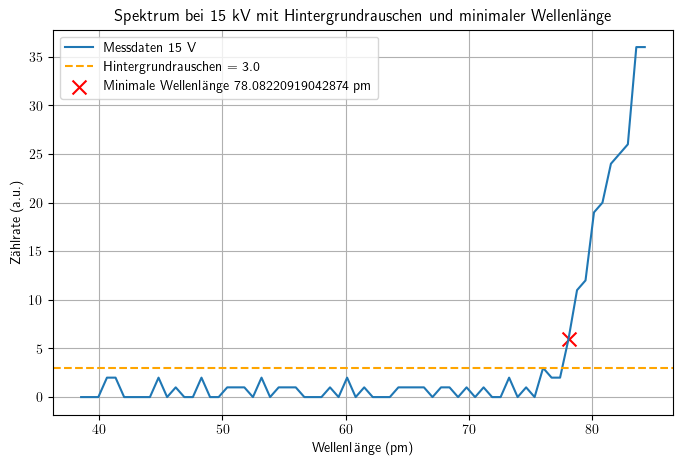

78.08220919042874


In [ ]:
data = np.loadtxt('Versuch3_16V.txt', skiprows=3)  
angle_16 = data[:, 0] 
counts_16 = data[:, 1]  
errors_16 = np.sqrt(counts_16)

wavelengths_16 = bragg_winkel_to_wavelength(angle_16, d_LiF)
wavelengths_16_PM = wavelengths_16 * 1000

mask_bg = (wavelengths_16_PM >= 40) & (wavelengths_16_PM <= 78)
bg_level = np.max(counts_16[mask_bg])


mask_signal = counts_16 > bg_level
idx_min = np.argmax(mask_signal) 

# Exakte Werte aus den Daten
min_lambda = wavelengths_16_PM[idx_min]
min_lambda_count = counts_16[idx_min]


plt.figure(figsize=(8,5))
plt.plot(wavelengths_16_PM, counts_16, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)



für 17V

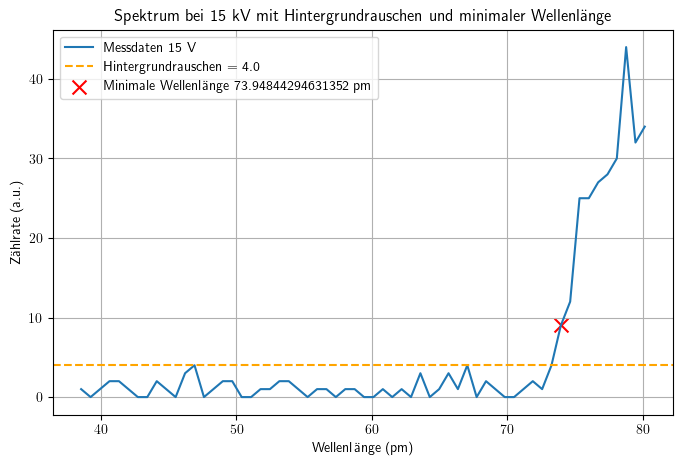

73.94844294631352


In [ ]:
data = np.loadtxt('Versuch3_17V.txt', skiprows=3)  
angle_17 = data[:, 0]  
counts_17 = data[:, 1] 
errors_17 = np.sqrt(counts_17)

wavelengths_17 = bragg_winkel_to_wavelength(angle_17, d_LiF)
wavelengths_17_PM = wavelengths_17 * 1000

mask_bg = (wavelengths_17_PM >= 40) & (wavelengths_17_PM <= 72)
bg_level = np.max(counts_17[mask_bg])


mask_signal = counts_17 > bg_level
idx_min = np.argmax(mask_signal)  # erster True-Wert

# Exakte Werte aus den Daten
min_lambda = wavelengths_17_PM[idx_min]
min_lambda_count = counts_17[idx_min]


plt.figure(figsize=(8,5))
plt.plot(wavelengths_17_PM, counts_17, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)



für 18 V

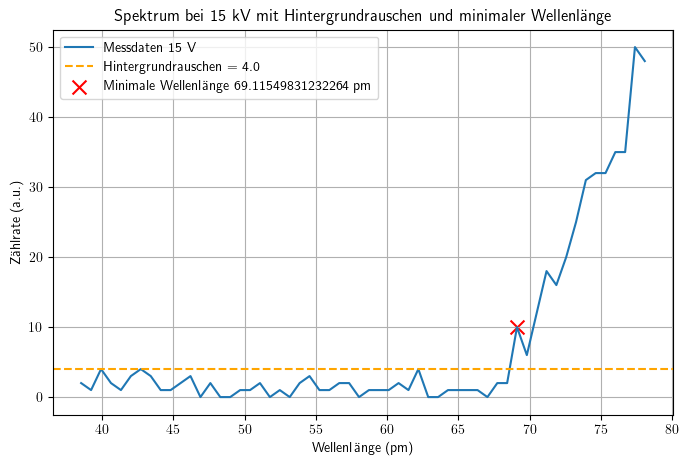

69.11549831232264


In [ ]:
data = np.loadtxt('Versuch3_18V.txt', skiprows=3)  
angle_18 = data[:, 0]  
counts_18 = data[:, 1] 
errors_18 = np.sqrt(counts_18)

wavelengths_18 = bragg_winkel_to_wavelength(angle_18, d_LiF)
wavelengths_18_PM = wavelengths_18 * 1000

mask_bg = (wavelengths_18_PM >= 40) & (wavelengths_18_PM <= 67)
bg_level = np.max(counts_18[mask_bg])


mask_signal = counts_18 > bg_level
idx_min = np.argmax(mask_signal)  # erster True-Wert

# Exakte Werte aus den Daten
min_lambda = wavelengths_18_PM[idx_min]
min_lambda_count = counts_18[idx_min]


plt.figure(figsize=(8,5))
plt.plot(wavelengths_18_PM, counts_18, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)



für 19 V

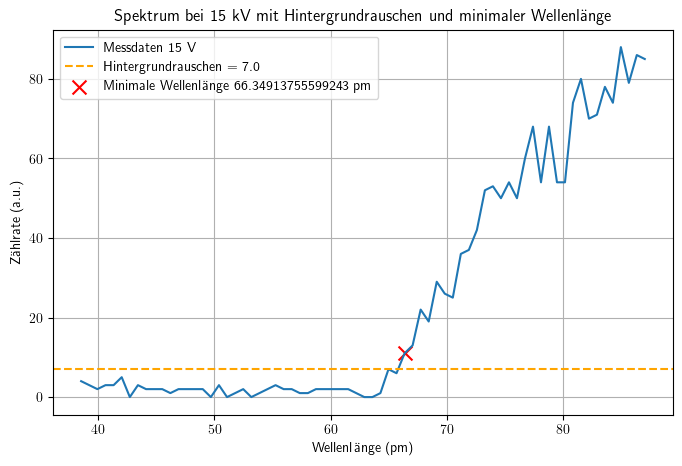

66.34913755599243


In [ ]:
data = np.loadtxt('Versuch3_19V.txt', skiprows=3)  
angle_19 = data[:, 0]  
counts_19 = data[:, 1] 
errors_19 = np.sqrt(counts_19)

wavelengths_19 = bragg_winkel_to_wavelength(angle_19, d_LiF)
wavelengths_19_PM = wavelengths_19 * 1000

mask_bg = (wavelengths_19_PM >= 40) & (wavelengths_19_PM <= 65)
bg_level = np.max(counts_19[mask_bg])


mask_signal = counts_19 > bg_level
idx_min = np.argmax(mask_signal)  # erster True-Wert

# Exakte Werte aus den Daten
min_lambda = wavelengths_19_PM[idx_min]
min_lambda_count = counts_19[idx_min]


plt.figure(figsize=(8,5))
plt.plot(wavelengths_19_PM, counts_19, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)



für 20 V

/var/folders/7g/074dyn7d5zqchxk1vd2rgmzr0000gn/T/ipykernel_28670/2037964727.py:20: RuntimeWarning: divide by zero encountered in divide
  rel_lambda_err = 1 / (2 * np.sqrt(counts_20))


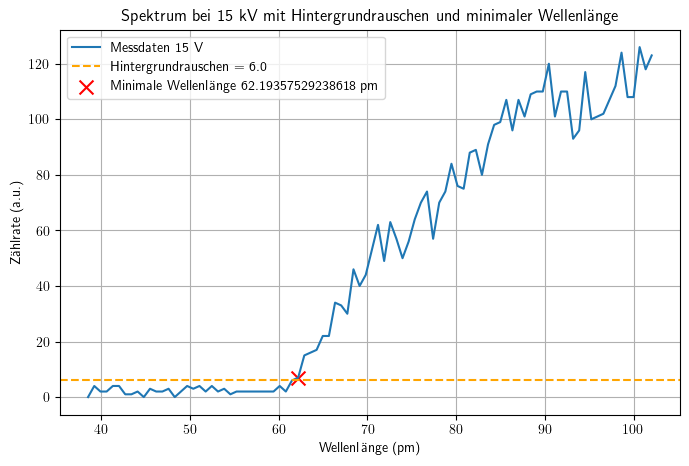

62.19357529238618
11.753480954973218


In [ ]:
data = np.loadtxt('Versuch3_20V.txt', skiprows=3) 
angle_20 = data[:, 0]  
counts_20 = data[:, 1]  
errors_20 = np.sqrt(counts_20)

wavelengths_20 = bragg_winkel_to_wavelength(angle_20, d_LiF)
wavelengths_20_PM = wavelengths_20 * 1000

mask_bg = (wavelengths_20_PM >= 40) & (wavelengths_20_PM <= 62)
bg_level = np.max(counts_20[mask_bg])


mask_signal = counts_20 > bg_level
idx_min = np.argmax(mask_signal)  # erster True-Wert

# Exakte Werte aus den Daten
min_lambda = wavelengths_20_PM[idx_min]
min_lambda_count = counts_20[idx_min]
rel_lambda_err = 1 / (2 * np.sqrt(counts_20))
delta_lambda = wavelengths_20_PM * rel_lambda_err


plt.figure(figsize=(8,5))
plt.plot(wavelengths_20_PM, counts_20, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)
print(delta_lambda[idx_min])




für 25 V

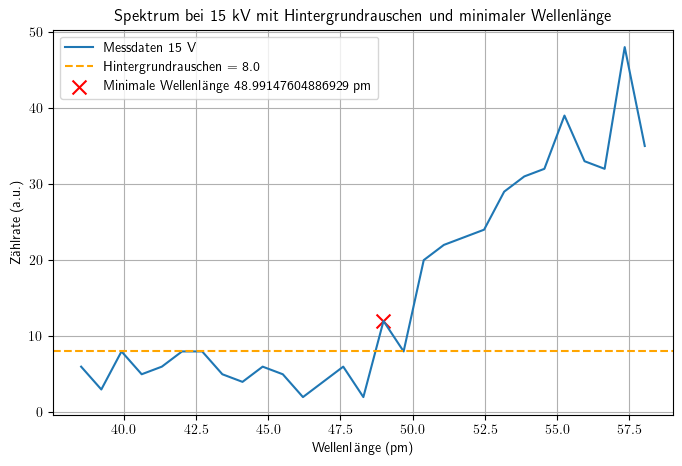

48.99147604886929
7.071310471202947


In [ ]:
data = np.loadtxt('Versuch3_25V.txt', skiprows=3) 
angle_25 = data[:, 0]  
counts_25 = data[:, 1]  
errors_25 = np.sqrt(counts_25)

wavelengths_25 = bragg_winkel_to_wavelength(angle_25, d_LiF)
wavelengths_25_PM = wavelengths_25 * 1000

mask_bg = (wavelengths_25_PM >= 40) & (wavelengths_25_PM <= 48)
bg_level = np.max(counts_25[mask_bg])

mask_signal = counts_25 > bg_level
idx_min = np.argmax(mask_signal) 

# Exakte Werte aus den Daten
min_lambda = wavelengths_25_PM[idx_min]
min_lambda_count = counts_25[idx_min]
rel_lambda_err = 1 / (2 * np.sqrt(counts_25))
delta_lambda = wavelengths_25_PM * rel_lambda_err

plt.figure(figsize=(8,5))
plt.plot(wavelengths_25_PM, counts_25, label='Messdaten 15 V')

# Hintergrundrauschen als horizontale Linie
plt.axhline(y=bg_level, color='orange', linestyle='--', label=f'Hintergrundrauschen = {bg_level:.1f}')


plt.scatter(min_lambda, min_lambda_count, color='red', marker='x', s=100, label=f'Minimale Wellenlänge {min_lambda} pm')

plt.xlabel('Wellenlänge (pm)')
plt.ylabel('Zählrate (a.u.)')
plt.title('Spektrum bei 15 kV mit Hintergrundrauschen und minimaler Wellenlänge')
plt.legend()
plt.grid(True)
plt.show()

print(min_lambda)
print(delta_lambda[idx_min])



### Nun plotte ich anodenspannung gegen die minimale Wellenlänge

In [224]:
%matplotlib inline

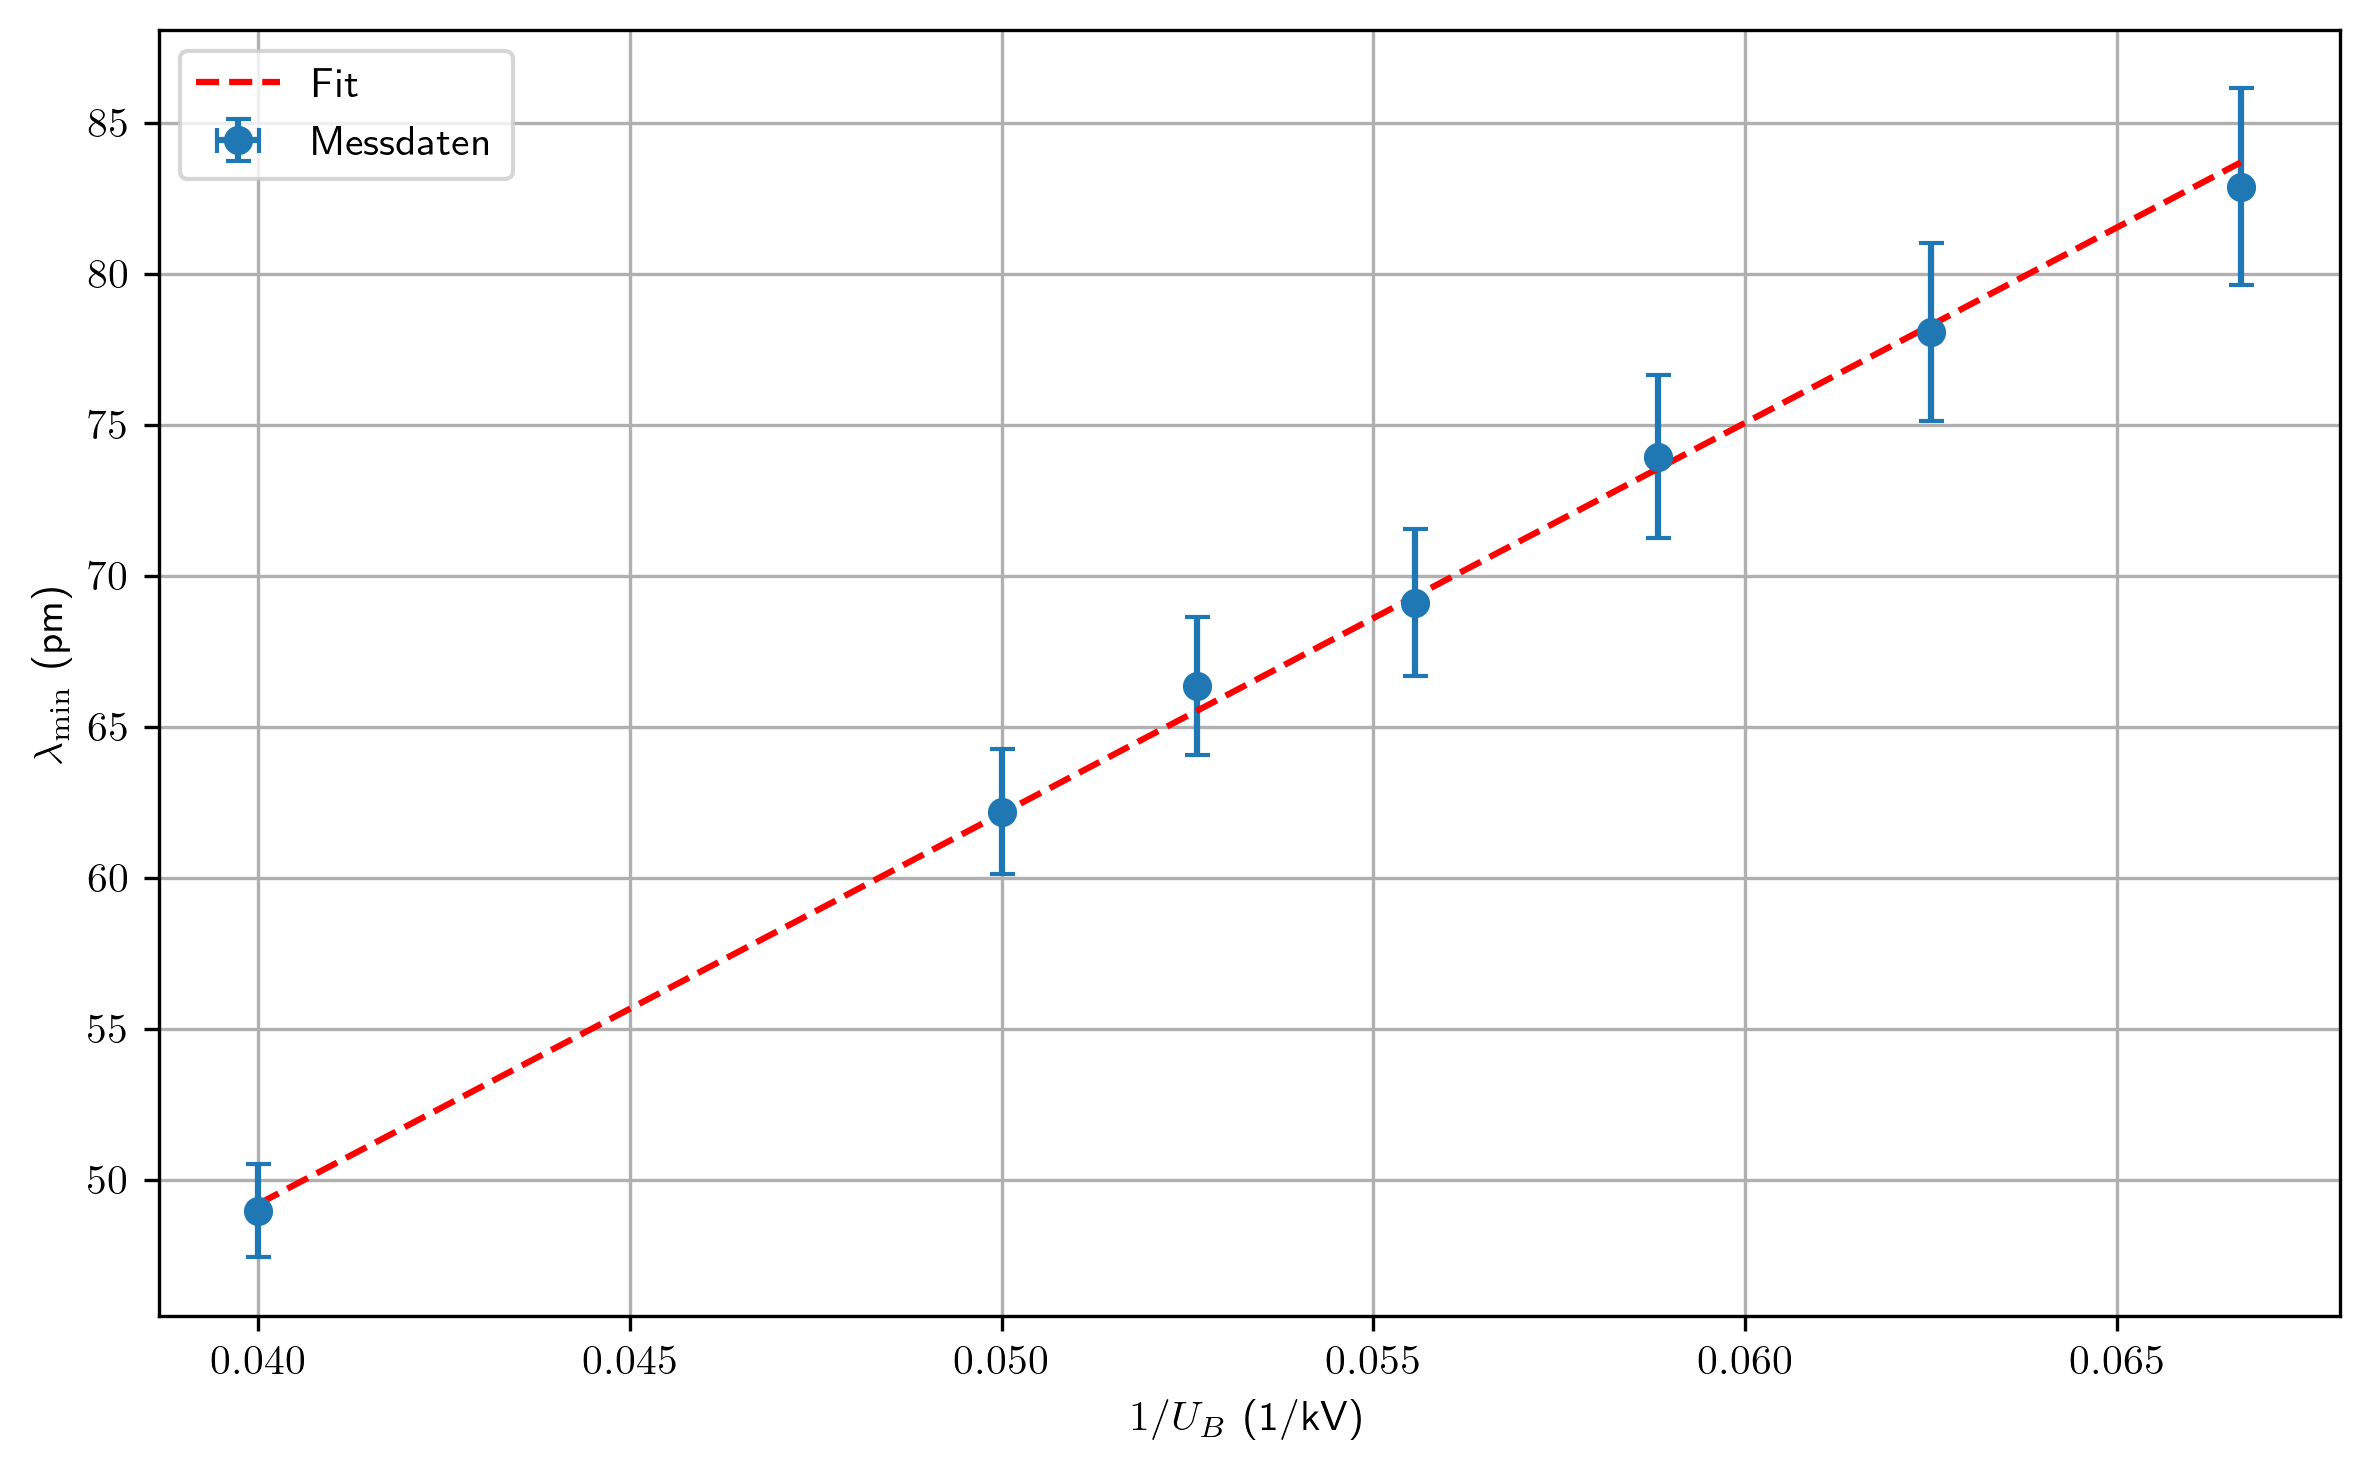

Fit-Ergebnisse:
Steigung m = 1293.466566 ± 99.295745
Achsenabschnitt b = -2.537088 ± 5.146271


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Messdaten
U_V = np.array([25, 20, 19, 18, 17, 16, 15])  
lambda_min_pm = np.array([48.99, 62.19, 66.35, 69.12, 73.95, 78.08, 82.89])  
counts = np.array([1000, 900, 850, 800, 750, 700, 650])  

# Fehlerberechnung (√N bei Zählraten)
error_lambda_min_pm = lambda_min_pm * (1 / np.sqrt(counts))  
error_U_kV = np.full_like(U_V, 0.1)  

# Transformation: 1/U
inv_U = 1 / U_V
error_inv_U = error_U_kV / U_V**2  # Fehlerfortpflanzung von U -> 1/U

# Lineare Fitfunktion
def linear(x, m, b):
    return m * x + b

# Fit mit Fehlern
popt, pcov = curve_fit(linear, inv_U, lambda_min_pm, sigma=error_lambda_min_pm, absolute_sigma=True)
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Fitkurve erzeugen
inv_U_fit = np.linspace(min(inv_U), max(inv_U), 500)
lambda_fit = linear(inv_U_fit, *popt)

# Plot
plt.figure(figsize=(8, 5), dpi=300)
plt.errorbar(inv_U, lambda_min_pm, xerr=error_inv_U, yerr=error_lambda_min_pm,
             fmt='o', label='Messdaten', capsize=3)
plt.plot(inv_U_fit, lambda_fit, 'r--', label=f'Fit')

plt.xlabel(r'$1 / U_B$ (1/kV)')
plt.ylabel(r'$\lambda_\mathrm{min}$ (pm)')
plt.grid(True)
plt.legend()


try:
    plt.tight_layout()
except Exception as e:
    print("Warnung bei tight_layout:", e)

plt.show()

print("Fit-Ergebnisse:")
print(f"Steigung m = {slope:.6f} ± {slope_err:.6f}")
print(f"Achsenabschnitt b = {intercept:.6f} ± {intercept_err:.6f}")


In [ ]:
# Konstanten
d_pm = 201.4  # Gitterkonstante in pm
d = d_pm * 1e-12  # in m
e = 1.602176634e-19  # C
c = 299792458  # m/s

# Fitparameter aus dem Fit sin(theta_min) gegen 1/U
m_sin = 3.164896 * 1000 
m_sin_err = 0.023083 * 1000 

# Fitparameter aus dem Fit lambda_min gegen 1/U
m_lambda_pmV = 1293.466566 * 1000  # in pm·V (also pm/V)
m_lambda_err = 99.295745 * 1000  # Fehler in pm·V

# 1) Berechnung h aus sin(theta_min)
h_sin = (2 * d * e / c) * m_sin
h_sin_err = (2 * d * e / c) * m_sin_err

print(f"h (aus sin(theta_min)) = ({h_sin:.3e} ± {h_sin_err:.3e}) J·s")

# 2) Berechnung h aus lambda_min
# Umrechnung m_lambda_pmV von pm/V zu m/V:
m_lambda = m_lambda_pmV * 1e-12  # m/V
m_lambda_err_m = m_lambda_err * 1e-12  # m/V

h_lambda = (e / c) * m_lambda
h_lambda_err = (e / c) * m_lambda_err_m

print(f"h (aus lambda_min) = ({h_lambda:.3e} ± {h_lambda_err:.3e}) J·s")

# Literaturwert h:
print("Literaturwert h = 6.62607015e-34 J·s")


h (aus sin(theta_min)) = (6.813e-34 ± 4.969e-36) J·s
h (aus lambda_min) = (6.913e-34 ± 5.307e-35) J·s
Literaturwert h = 6.62607015e-34 J·s


## Versuch 4: Absorptionsgesetz für Röntgenstrahlung

In [190]:
%matplotlib inline

In [266]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


Fit λ=71 pm:    mu = {mu_42:.4f} ± {mu_42_err:.4f}, c = {c_42:.4f} ± {c_42_err:.4f}
Fit λ=139 pm:   mu = {mu_36:.4f} ± {mu_36_err:.4f}, c = {c_36:.4f} ± {c_36_err:.4f}
2.7552652053425466
0.13198125772935265
-0.0214301487757307
0.011041528541478829
8.285720787022832
0.29122619551629747
0.0256376666168389
0.0025363877315038733


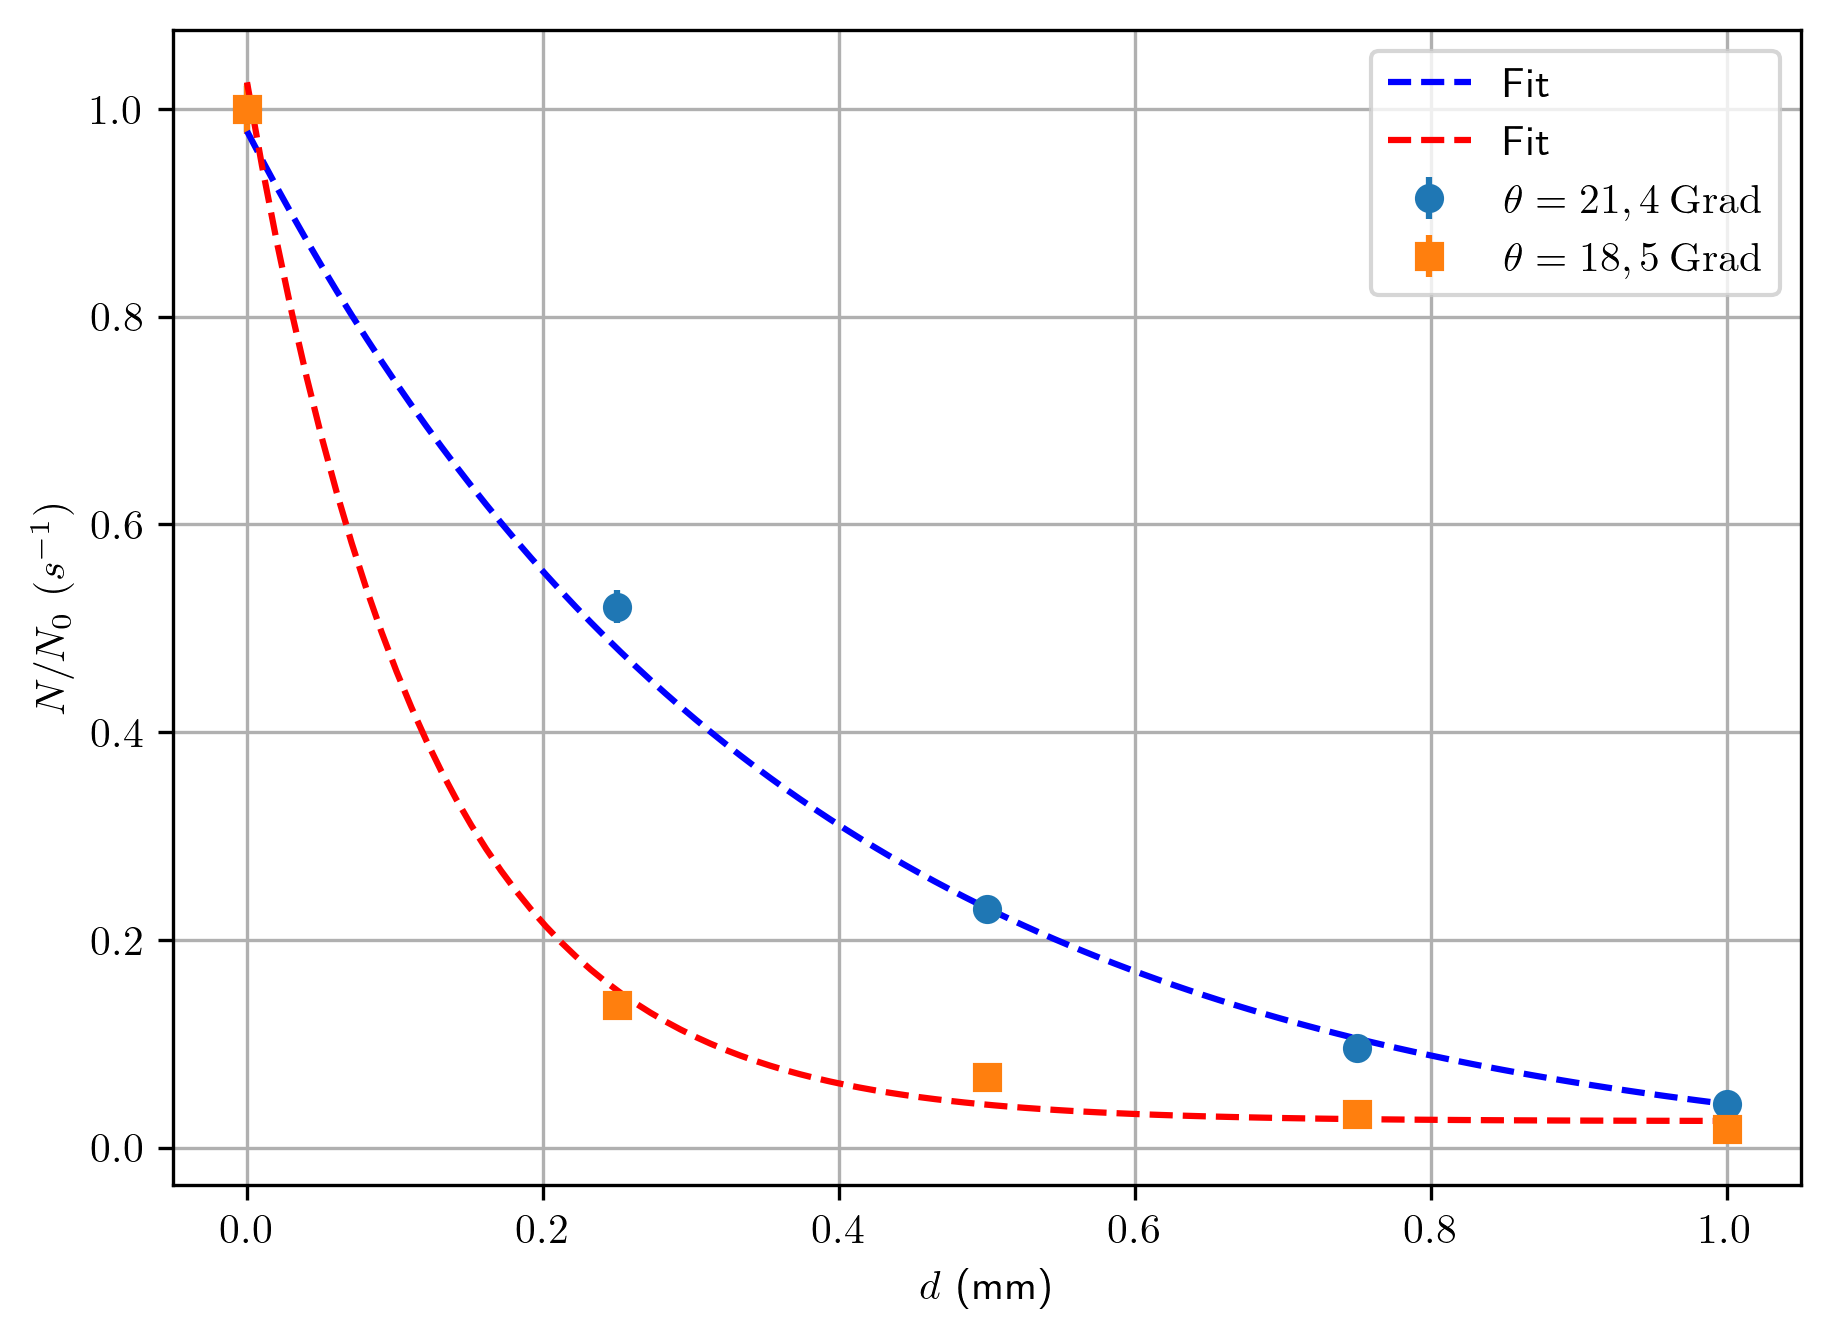

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# Beispielwerte
d_zn = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
I0_zn_42 = 2028
I_zn_42 = np.array([2028, 1056, 466, 194, 86])
I0_zn_36 = 1760
I_zn_36 = np.array([1760, 242, 120, 58, 32])

# Fehler von I aus Poisson-Statistik
I_zn_42_error = np.sqrt(I_zn_42)
I_zn_36_error = np.sqrt(I_zn_36)

# Funktion zum Fitten
def exp_fit(d, mu, c):
    return np.exp(-mu * d) + c

N_norm_42 = I_zn_42 / I0_zn_42
N_norm_36 = I_zn_36 / I0_zn_36

popt_42, pcov_42 = curve_fit(exp_fit, d_zn, N_norm_42, sigma=I_zn_42_error/I0_zn_42, absolute_sigma=True, p0=[1, 0])
mu_42, c_42 = popt_42
mu_42_err, c_42_err = np.sqrt(np.diag(pcov_42))

popt_36, pcov_36 = curve_fit(exp_fit, d_zn, N_norm_36, sigma=I_zn_36_error/I0_zn_36, absolute_sigma=True, p0=[3, 0])
mu_36, c_36 = popt_36
mu_36_err, c_36_err = np.sqrt(np.diag(pcov_36))

print("Fit λ=71 pm:    mu = {mu_42:.4f} ± {mu_42_err:.4f}, c = {c_42:.4f} ± {c_42_err:.4f}")
print("Fit λ=139 pm:   mu = {mu_36:.4f} ± {mu_36_err:.4f}, c = {c_36:.4f} ± {c_36_err:.4f}")

print(mu_42) 
print(mu_42_err)
print(c_42)
print(c_42_err)

print(mu_36)
print(mu_36_err)
print(c_36)
print(c_36_err)


# Plot
plt.figure(figsize=(7,5), dpi=300)
plt.errorbar(d_zn, N_norm_42, yerr=I_zn_42_error/I0_zn_42, fmt='o', label=r'$\mathrm{\theta} = 21,4 \mathrm{\: Grad}$')
plt.errorbar(d_zn, N_norm_36, yerr=I_zn_36_error/I0_zn_36, fmt='s', label=r'$\mathrm{\theta} = 18,5 \mathrm{\: Grad}$')

d_fit = np.linspace(0, 1.0, 100)
plt.plot(d_fit, exp_fit(d_fit, *popt_42), 'b--', label='Fit')
plt.plot(d_fit, exp_fit(d_fit, *popt_36), 'r--', label='Fit')

plt.xlabel('$d$ (mm)')
plt.ylabel('$N/N_0$ $(s^{-1})$')
#plt.title('Exponentialfit der Abschwächung')
plt.grid(True)
plt.legend()
plt.show()


### Berechnung für Aluminium

0.6986863137383597
0.0500695981342073
0.0002588375378087716
0.018950465745154656
1.0392758445307455
0.06374845832769387
0.03769809922049878
0.0190607965622699


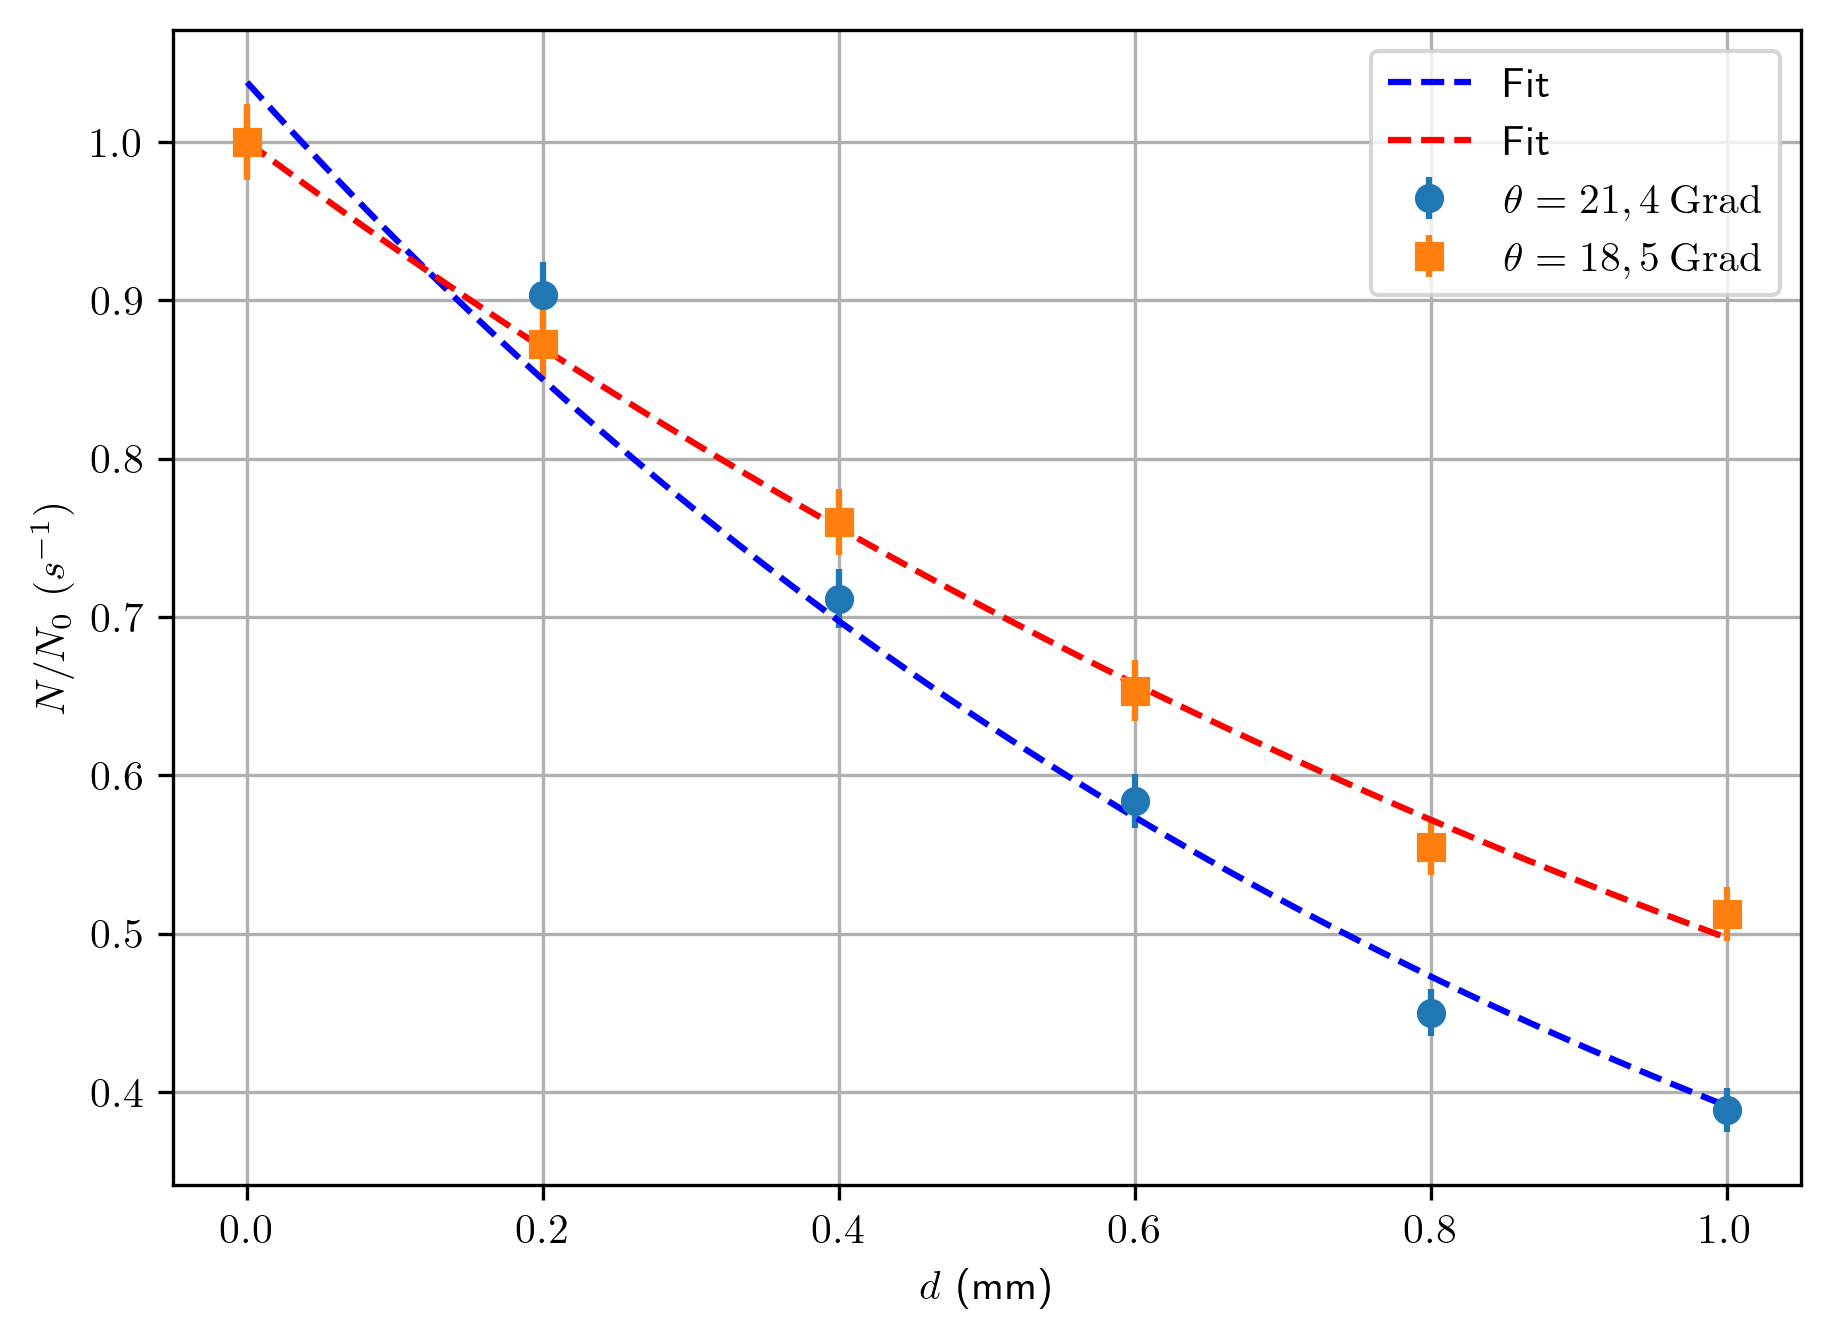

In [306]:
import numpy as np
import matplotlib.pyplot as plt

# Beispielwerte
d_al = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
I0_al_42 = 2028
I_al_42 = np.array([2028, 1832, 1443, 1184, 913, 788])
I0_al_36 = 1760
I_al_36 = np.array([1760, 1536, 1338, 1150, 977, 902])

# Fehler von I aus Poisson-Statistik
I_al_42_error = np.sqrt(I_al_42)
I_al_36_error = np.sqrt(I_al_36)

# Funktion zum Fitten
def exp_fit(d, mu, c):
    return np.exp(-mu * d) + c

N_norm_42 = I_al_42 / I0_al_42
N_norm_36 = I_al_36 / I0_al_36

popt_42, pcov_42 = curve_fit(exp_fit, d_al, N_norm_42, sigma=I_al_42_error/I0_al_42, absolute_sigma=True, p0=[1, 0])
mu_42, c_42 = popt_42
mu_42_err, c_42_err = np.sqrt(np.diag(pcov_42))

popt_36, pcov_36 = curve_fit(exp_fit, d_al, N_norm_36, sigma=I_al_36_error/I0_al_36, absolute_sigma=True, p0=[3, 0])
mu_36, c_36 = popt_36
mu_36_err, c_36_err = np.sqrt(np.diag(pcov_36))

#print("Fit λ=71 pm:    mu = {mu_42:.4f} ± {mu_42_err:.4f}, c = {c_42:.4f} ± {c_42_err:.4f}")
#print("Fit λ=139 pm:   mu = {mu_36:.4f} ± {mu_36_err:.4f}, c = {c_36:.4f} ± {c_36_err:.4f}")
print(mu_36)
print(mu_36_err)
print(c_36)
print(c_36_err)

print(mu_42)
print(mu_42_err)
print(c_42)
print(c_42_err)
# Plot
plt.figure(figsize=(7,5), dpi=300)
plt.errorbar(d_al, N_norm_42, yerr=I_al_42_error/I0_al_42, fmt='o', label=r'$\mathrm{\theta} = 21,4 \mathrm{\: Grad}$')
plt.errorbar(d_al, N_norm_36, yerr=I_al_36_error/I0_al_36, fmt='s', label=r'$\mathrm{\theta} = 18,5 \mathrm{\: Grad}$')

d_fit = np.linspace(0, 1.0, 100)
plt.plot(d_fit, exp_fit(d_fit, *popt_42), 'b--', label='Fit')
plt.plot(d_fit, exp_fit(d_fit, *popt_36), 'r--', label='Fit')

plt.xlabel('$d$ (mm)')
plt.ylabel('$N/N_0$ $(s^{-1})$')
#plt.title('Exponentialfit der Abschwächung')
plt.grid(True)
plt.legend()
plt.show()


Umrechnung der $\mu$ in $x_{1/2}$

In [313]:
mu_36_al = 0.6986863137383597
mu_36_al_err = 0.0500695981342073

mu_42_al = 1.0392758445307455
mu_42_al_err = 0.06374845832769387


mu_36_zn = 8.285720787022832
mu_36_zn_err = 0.29122619551629747

mu_42_zn = 2.7552652053425466
mu_zn_42_err = 0.13198125772935265
#mu_zn_avg = 

x_half_al_36 = (np.log(2) / mu_36_al) * 1000
x_half_al_36_err = (np.log(2) / mu_36_al**2 * mu_36_al_err) * 1000
x_half_al_42 = (np.log(2) / mu_42_al) * 1000
x_half_al_42_err = (np.log(2) / mu_42_al**2 * mu_42_al_err) * 1000

x_half_zn_36 = (np.log(2) / mu_36_zn) * 1000
x_half_zn_36_err = (np.log(2) / mu_36_zn**2 * mu_36_zn_err) * 1000
x_half_zn_42 = (np.log(2) / mu_42_zn) * 1000
x_half_zn_42_err = (np.log(2) / mu_42_zn**2 * mu_zn_42_err) * 1000

print(x_half_al_36)
print(x_half_al_36_err)

print(x_half_al_42)
print(x_half_al_42_err)

print("\n")
      
print(x_half_zn_36)
print(x_half_zn_36_err)

print(x_half_zn_42)
print(x_half_zn_42_err)



992.0720743064553
71.0943510756886
666.9520745696881
40.91037692834293


83.6556285659008
2.9403248150636307
251.57185566598488
12.050662076275863


## Aufgabe 4.2

In [314]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

Loading the data

Fit-Parameter:
a = 0.0089 + 0.0007 (m²/kg)^(1/3) pm⁻¹
b = 1.2784e+00 + 0.9084


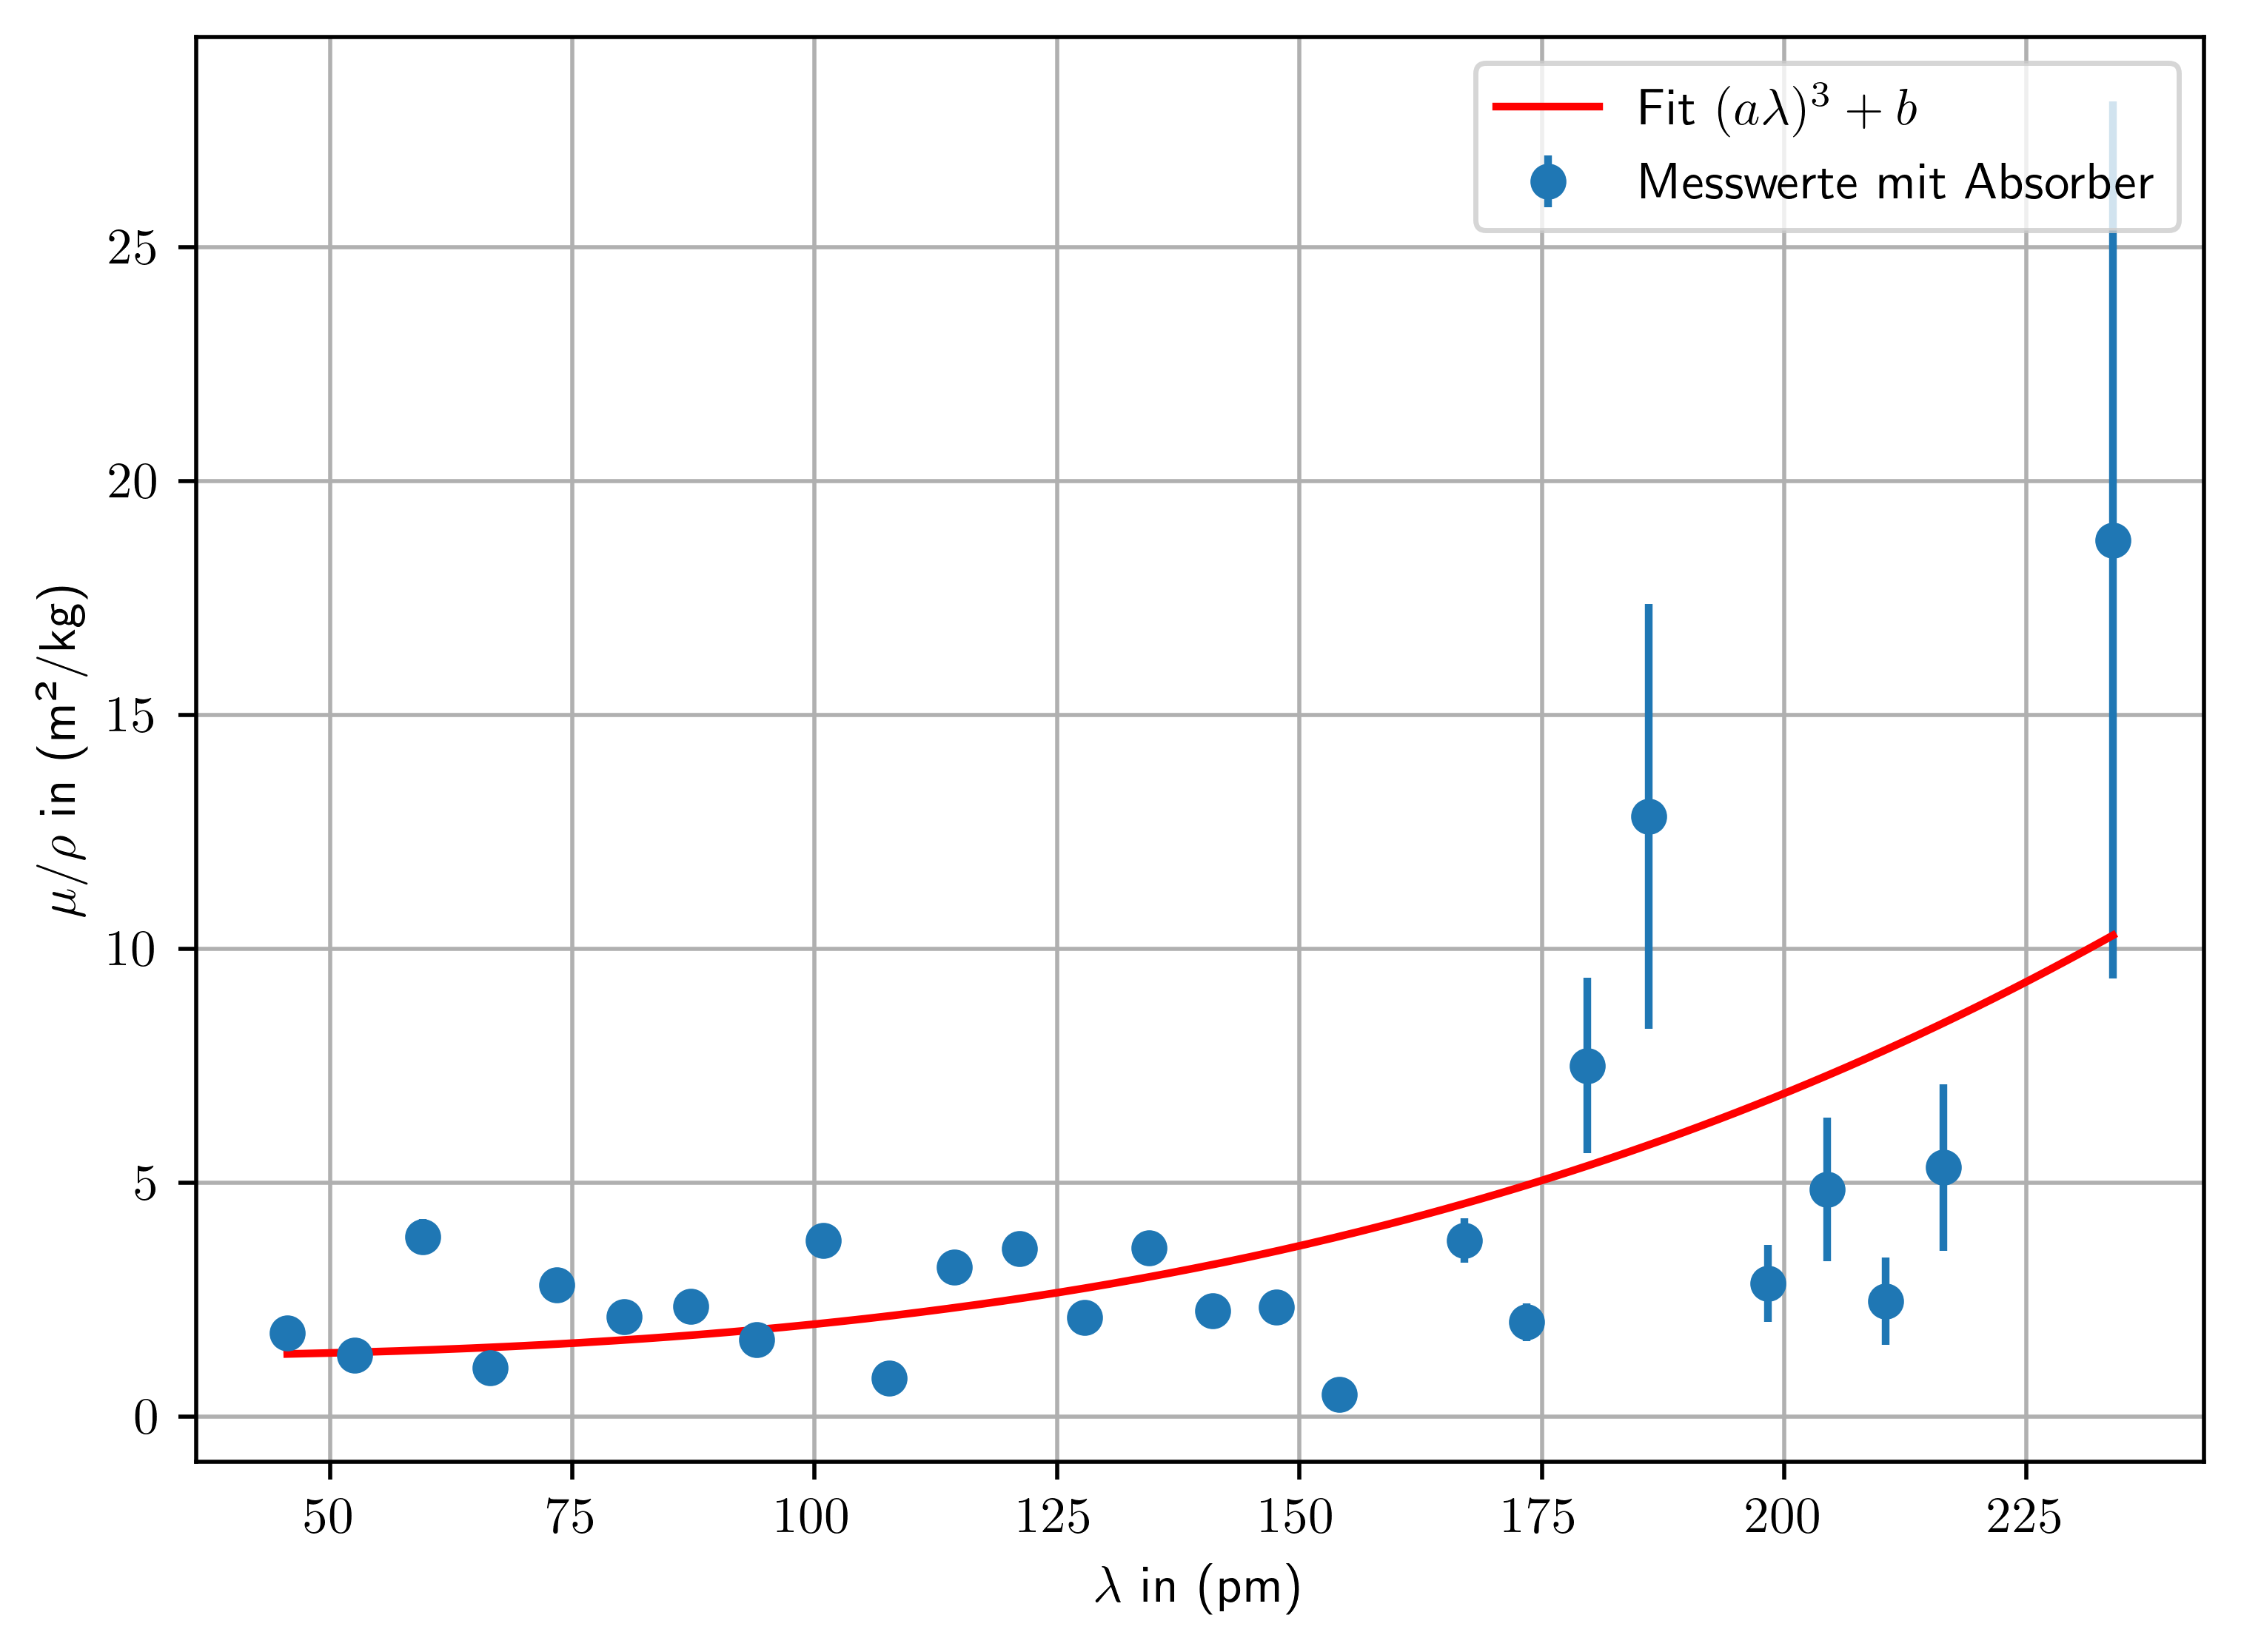

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Konstanten für LiF
d_LiF = 201.4e-12  # Gitterkonstante in m

# Materialparameter Aluminium
thickness_mm = 0.02      # Dicke in mm
thickness_m = thickness_mm * 1e-3
density_g_cm3 = 2.6989

def bragg_winkel_to_wavelength(theta_deg, d):
    theta_rad = np.radians(theta_deg)
    return 2 * d * np.sin(theta_rad)

def absorption_coeff(I0, I, x):
    # μ = 1/x * ln(I0/I)
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    # rho in g/cm3 → kg/m3 umrechnen
    rho_kg_m3 = rho * 1000
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd)**3 + b

# Daten einlesen
data_absorber = np.loadtxt('Versuch4_Teil2_Al20mikro.txt', skiprows=3)
data_no_absorber = np.loadtxt('Versuch4_Teil2_leer.txt', skiprows=3)

angle_abs = data_absorber[:, 0]
counts_abs = data_absorber[:, 1]

angle_no_abs = data_no_absorber[:, 0]
counts_no_abs = data_no_absorber[:, 1]

# Sicherstellen, dass Winkel in beiden Datensätzen übereinstimmen
assert np.allclose(angle_abs, angle_no_abs), "Winkel stimmen nicht überein!"

# Wellenlängen in pm (Pikometer)
wavelengths = bragg_winkel_to_wavelength(angle_abs, d_LiF) * 1e12

# Filter: nur Werte mit sinnvollen Zählraten (z.B. >0)
mask = (counts_abs > 0) & (counts_no_abs > 0) & (counts_abs < counts_no_abs)

wavelengths_filt = wavelengths[mask]
counts_abs_filt = counts_abs[mask]
counts_no_abs_filt = counts_no_abs[mask]

# μ berechnen
mu = absorption_coeff(counts_no_abs_filt, counts_abs_filt, thickness_m)

# Massenabsorptionskoeffizient μ/ρ
mu_rho = mass_abs_coeff(mu, density_g_cm3)

# Fit: Nur Wellenlängen ab 50 pm (wie im Beispiel)
fit_mask = wavelengths_filt >= 50
w_fit = wavelengths_filt[fit_mask]
mu_rho_fit = mu_rho[fit_mask]

popt, pcov = curve_fit(fit_function, w_fit, mu_rho_fit)
a, b = popt

# Fehler der Fitparameter (Standardabweichung = sqrt(varianz))
perr = np.sqrt(np.diag(pcov))
a_err, b_err = perr

conversion_factor_a = 10 ** (1 / 3)  # für a: (m²/kg/pm³)^(1/3) → (cm²/g/pm³)^(1/3)
conversion_factor_b = 10             # für b: m²/kg → cm²/g

# Umrechnung:
a_conv = a * conversion_factor_a
a_err_conv = a_err * conversion_factor_a

b_conv = b * conversion_factor_b
b_err_conv = b_err * conversion_factor_b

print(f"Fit-Parameter:")
print(f"a = {a:.4f} + {a_err:.4f} (m²/kg)^(1/3) pm⁻¹")
print(f"b = {b:.4e} + {b_err:.4f}")



# Plot erstellen
plt.figure(figsize=(7,5), dpi=500)
plt.errorbar(wavelengths_filt, mu_rho, yerr=np.sqrt(counts_abs_filt)/counts_abs_filt * mu_rho,
             fmt='o', label='Messwerte mit Absorber')
x_fit = np.linspace(min(wavelengths_filt), max(wavelengths_filt), 200)
plt.plot(x_fit, fit_function(x_fit, *popt), 'r-', label=r'Fit $(a\lambda)^3 + b$')

plt.xlabel('$\lambda$ in (pm)')
plt.ylabel(r'$\mu / \rho$ in (m²/kg)')
#plt.title('Massenabsorptionskoeffizient Aluminium')
plt.legend()
plt.grid(True)
plt.show()


Fit-Parameter:
a = 0.0183 + 0.0009 (m²/kg)^(1/3) pm⁻¹
b = 3.2131e+00 + 0.9383


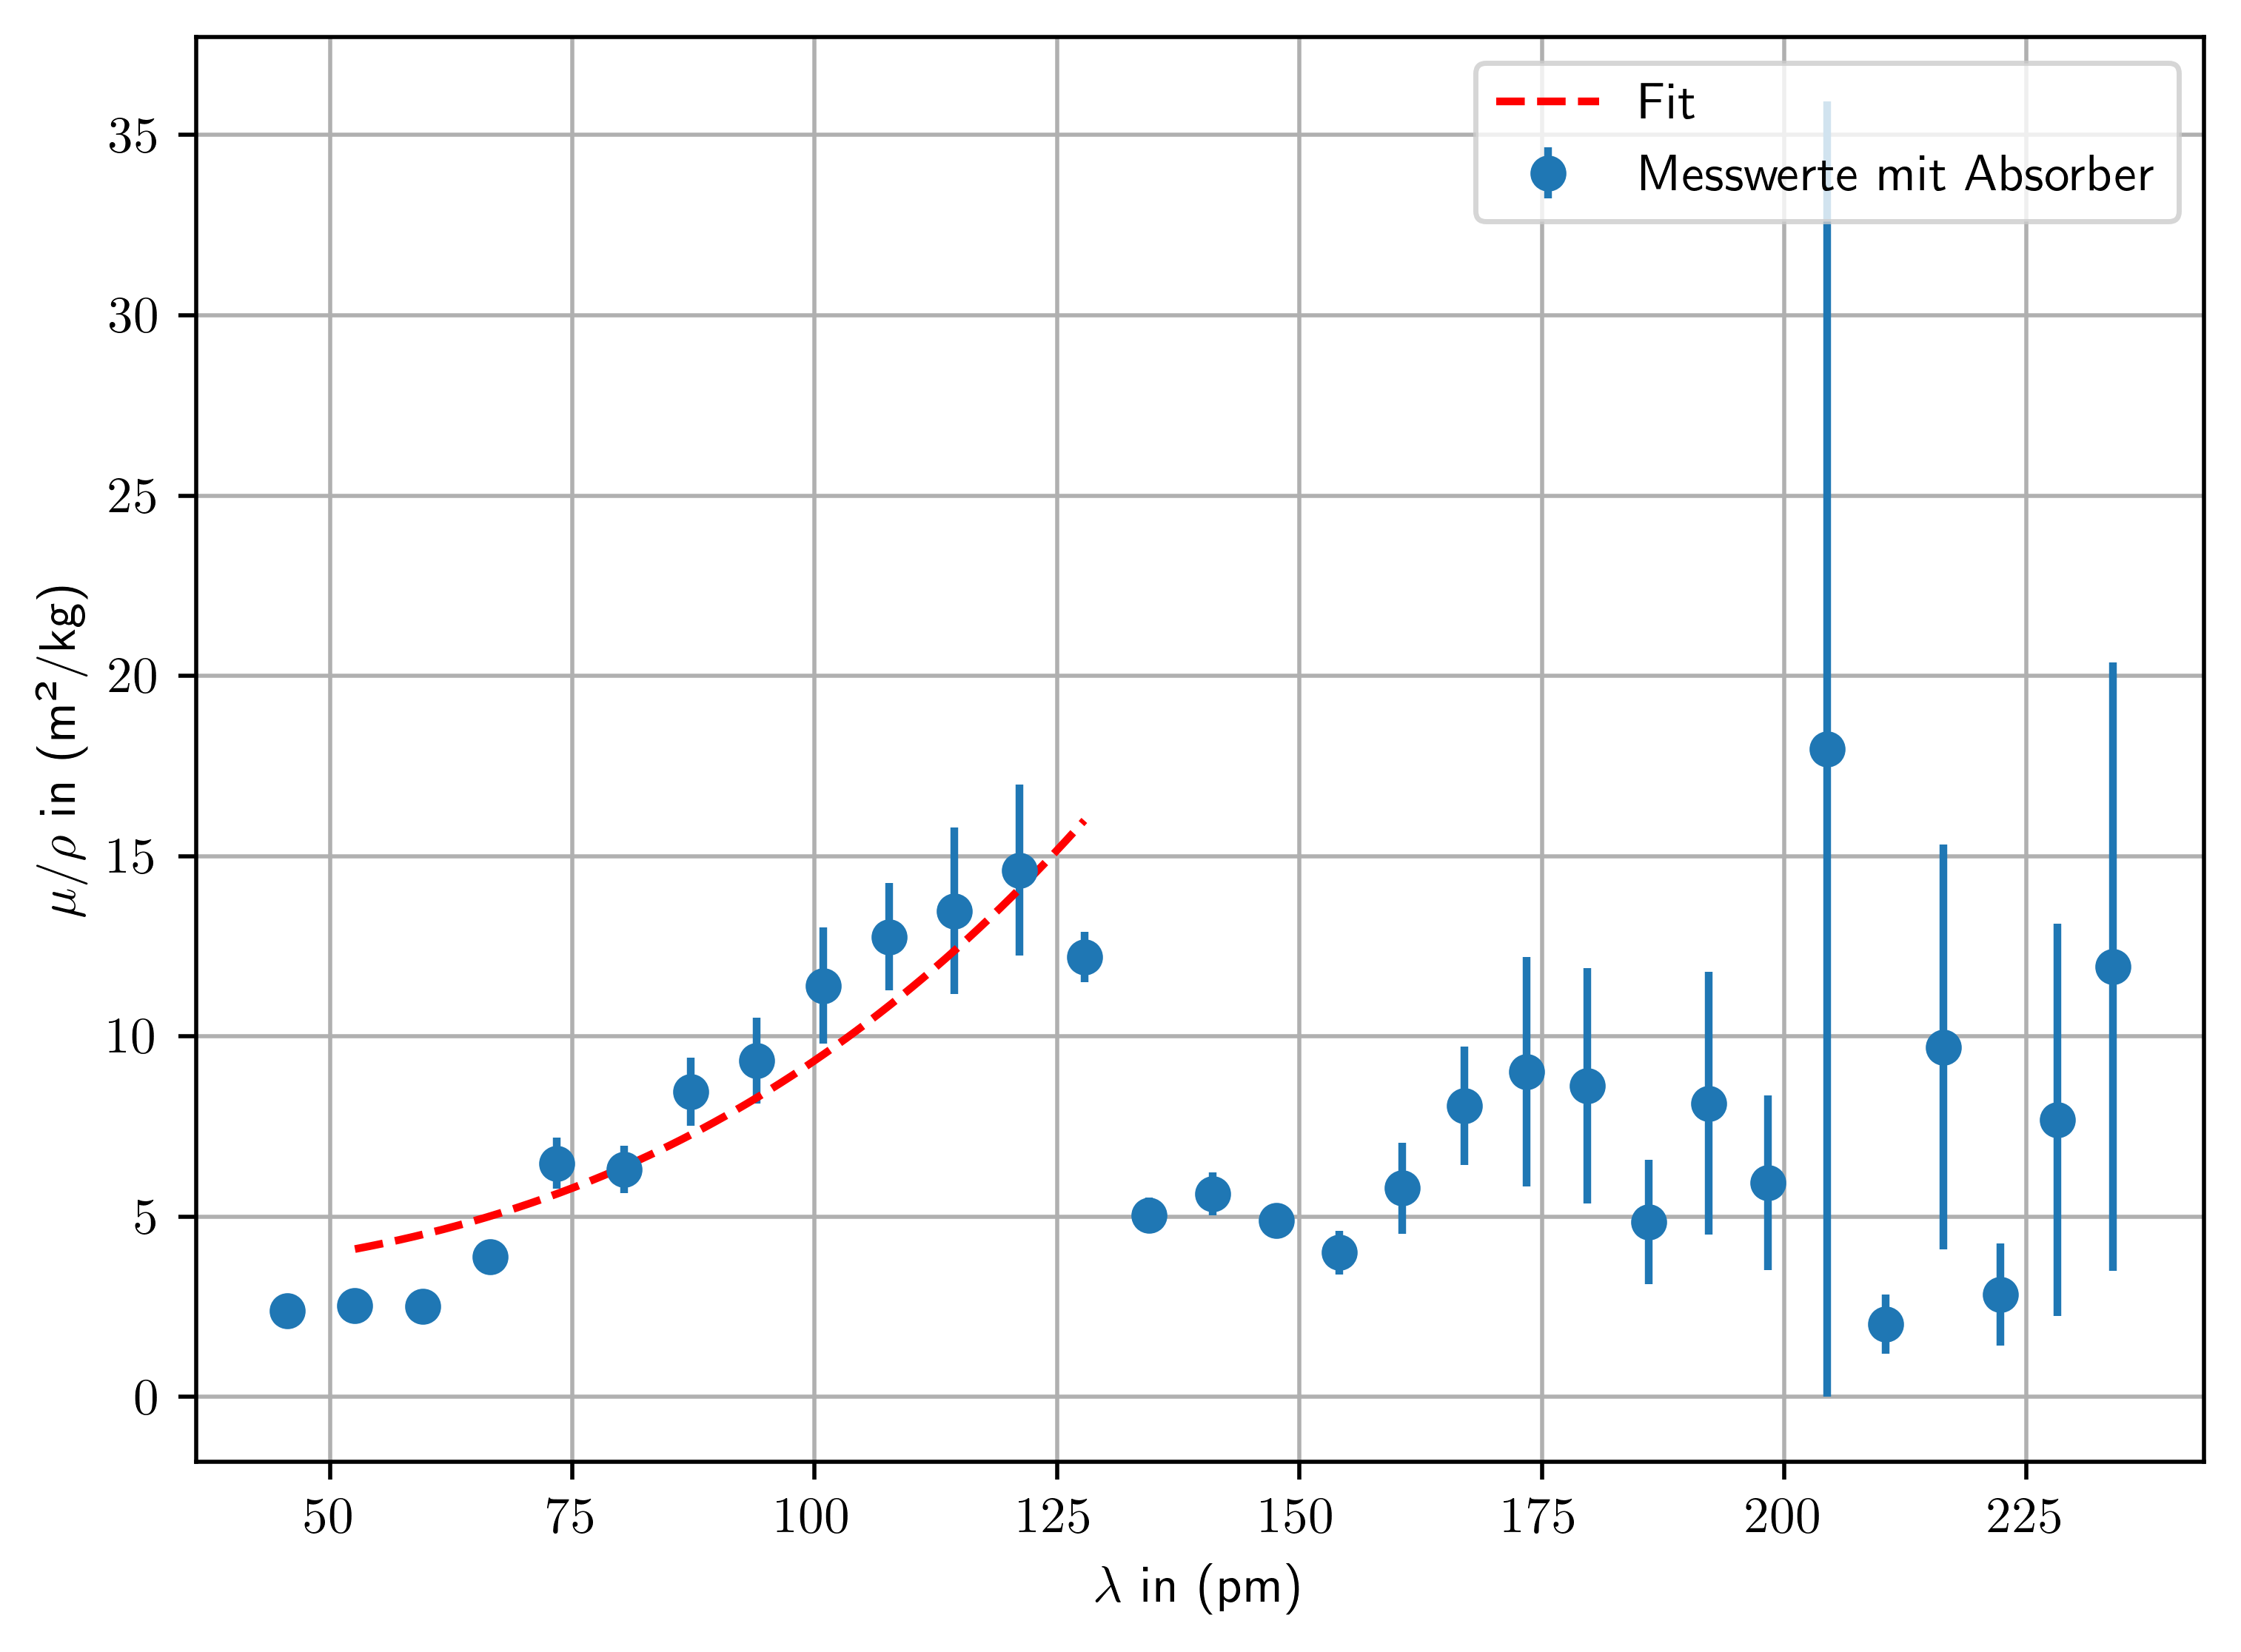

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Konstanten für LiF
d_LiF = 201.4e-12  # Gitterkonstante in m

# Materialparameter Aluminium
thickness_mm = 0.02      # Dicke in mm
thickness_m = thickness_mm * 1e-3
density_g_cm3 = 7.14

def bragg_winkel_to_wavelength(theta_deg, d):
    theta_rad = np.radians(theta_deg)
    return 2 * d * np.sin(theta_rad)

def absorption_coeff(I0, I, x):
    # μ = 1/x * ln(I0/I)
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    # rho in g/cm3 → kg/m3 umrechnen
    rho_kg_m3 = rho * 1000
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd)**3 + b

# Daten einlesen
data_absorber = np.loadtxt('Versuch4_Teil2_Zn25mikro.txt', skiprows=3)
data_no_absorber = np.loadtxt('Versuch4_Teil2_leer.txt', skiprows=3)

angle_abs = data_absorber[:, 0]
counts_abs = data_absorber[:, 1]

angle_no_abs = data_no_absorber[:, 0]
counts_no_abs = data_no_absorber[:, 1]

# Sicherstellen, dass Winkel in beiden Datensätzen übereinstimmen
assert np.allclose(angle_abs, angle_no_abs), "Winkel stimmen nicht überein!"

# Wellenlängen in pm (Pikometer)
wavelengths = bragg_winkel_to_wavelength(angle_abs, d_LiF) * 1e12

# Filter: nur Werte mit sinnvollen Zählraten (z.B. >0)
mask = (counts_abs > 0) & (counts_no_abs > 0) & (counts_abs < counts_no_abs)

wavelengths_filt = wavelengths[mask]
counts_abs_filt = counts_abs[mask]
counts_no_abs_filt = counts_no_abs[mask]

# μ berechnen
mu = absorption_coeff(counts_no_abs_filt, counts_abs_filt, thickness_m)

# Massenabsorptionskoeffizient μ/ρ
mu_rho = mass_abs_coeff(mu, density_g_cm3)

# Fit: Nur Wellenlängen ab 50 pm (wie im Beispiel)
fit_mask = wavelengths_filt >= 50
w_fit = wavelengths_filt[fit_mask]
mu_rho_fit = mu_rho[fit_mask]

popt, pcov = curve_fit(fit_function, w_fit[:12], mu_rho_fit[:12])

#popt, pcov = curve_fit(fit_function, w_fit, mu_rho_fit)
a, b = popt

# Fehler der Fitparameter (Standardabweichung = sqrt(varianz))
perr = np.sqrt(np.diag(pcov))
a_err, b_err = perr

conversion_factor_a = 10 ** (1 / 3)  # für a: (m²/kg/pm³)^(1/3) → (cm²/g/pm³)^(1/3)
conversion_factor_b = 10             # für b: m²/kg → cm²/g

# Umrechnung:
a_conv = a * conversion_factor_a
a_err_conv = a_err * conversion_factor_a

b_conv = b * conversion_factor_b
b_err_conv = b_err * conversion_factor_b

print(f"Fit-Parameter:")
print(f"a = {a:.4f} + {a_err:.4f} (m²/kg)^(1/3) pm⁻¹")
print(f"b = {b:.4e} + {b_err:.4f}")

# Plot erstellen
plt.figure(figsize=(7,5), dpi=500)
plt.errorbar(wavelengths_filt, mu_rho, yerr=np.sqrt(counts_abs_filt)/counts_abs_filt * mu_rho,
             fmt='o', label='Messwerte mit Absorber')

x_fit = np.linspace(min(w_fit[:12]), max(w_fit[:12]), 200)
plt.plot(x_fit, fit_function(x_fit, *popt), 'r--', label='Fit')

#x_fit = np.linspace(min(wavelengths_filt), max(wavelengths_filt), 200)
#plt.plot(x_fit, fit_function(x_fit, *popt), 'r-', label='Fit')

plt.xlabel('$\lambda$ in (pm)')
plt.ylabel(r'$\mu / \rho$ in (m²/kg)')
#plt.xlabel('Wellenlänge λ (pm)')
#plt.ylabel('Massenabsorptionskoeffizient μ/ρ (m²/kg)')
#plt.title('Massenabsorptionskoeffizient Aluminium')
plt.legend()
plt.grid(True)
plt.show()


Fit-Parameter:
a = 0.0177 + 0.0006 (m²/kg)^(1/3) pm⁻¹
b = 2.9088e+00 + 0.8888


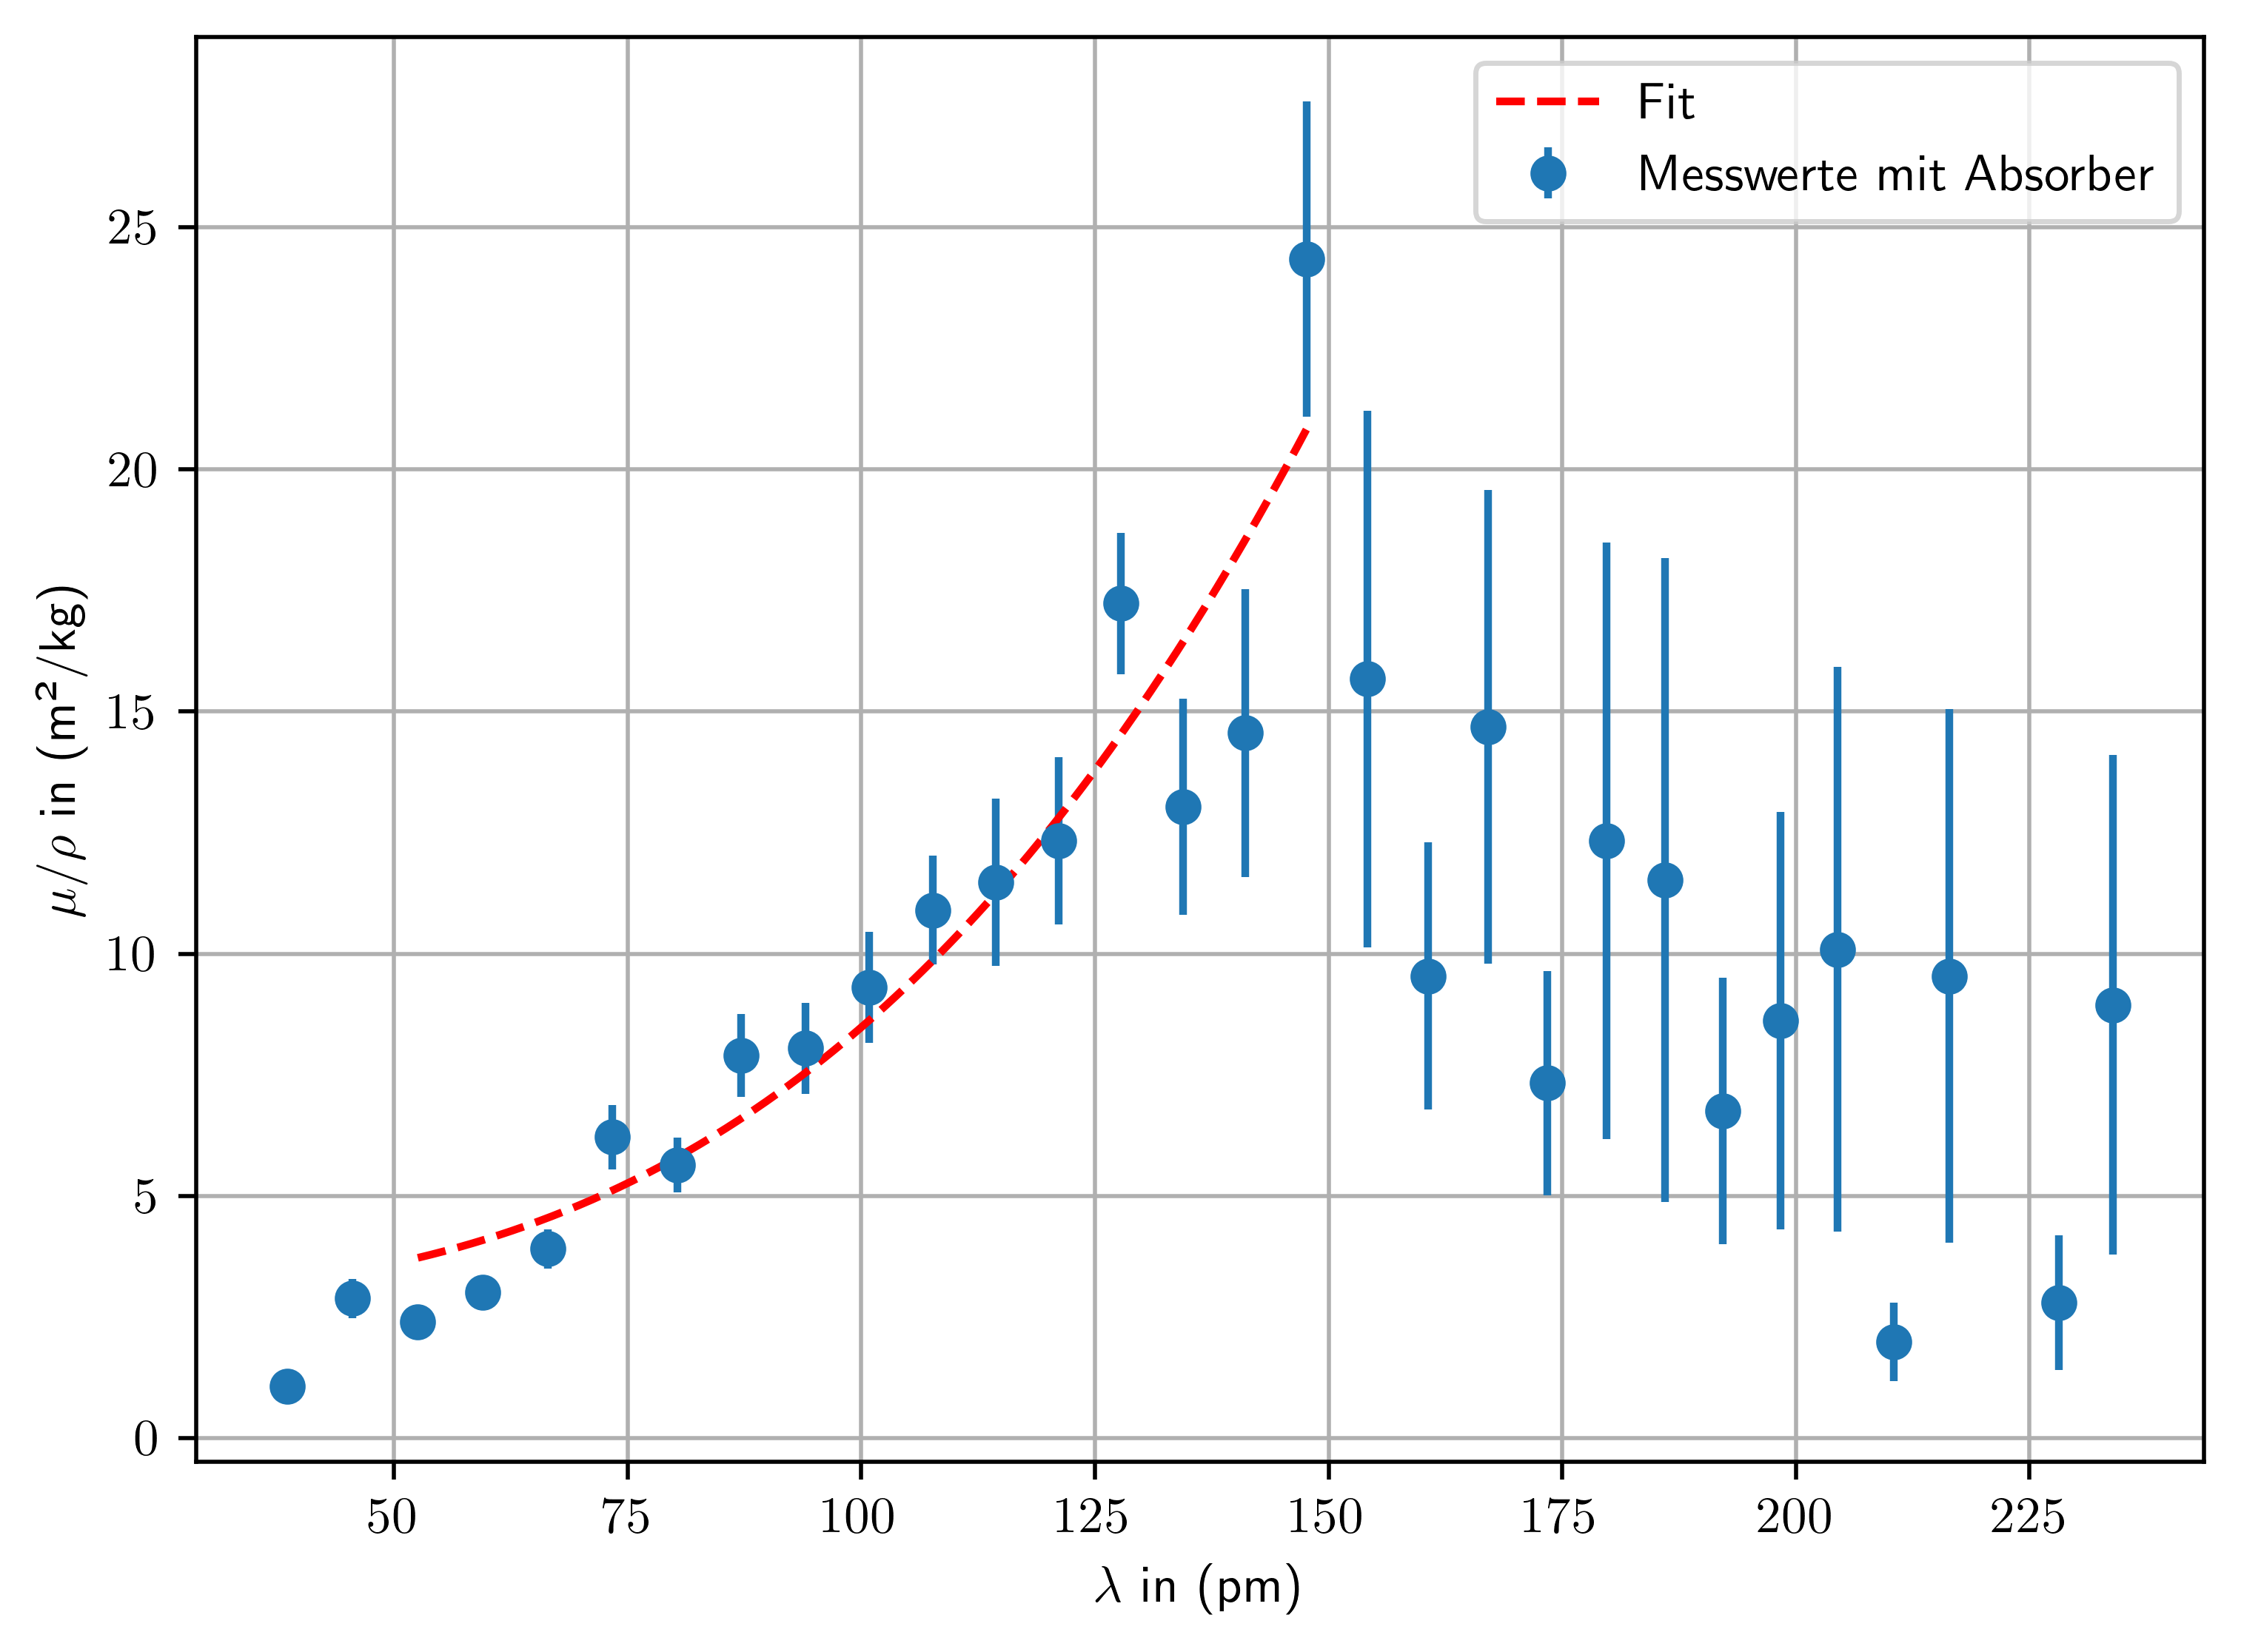

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Konstanten für LiF
d_LiF = 201.4e-12  # Gitterkonstante in m

# Materialparameter Aluminium
thickness_mm = 0.02      # Dicke in mm
thickness_m = thickness_mm * 1e-3
density_g_cm3 = 7.265

def bragg_winkel_to_wavelength(theta_deg, d):
    theta_rad = np.radians(theta_deg)
    return 2 * d * np.sin(theta_rad)

def absorption_coeff(I0, I, x):
    # μ = 1/x * ln(I0/I)
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    # rho in g/cm3 → kg/m3 umrechnen
    rho_kg_m3 = rho * 1000
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd)**3 + b

# Daten einlesen
data_absorber = np.loadtxt('Versuch4_Teil2_Sn25mikro.txt', skiprows=3)
data_no_absorber = np.loadtxt('Versuch4_Teil2_leer.txt', skiprows=3)

angle_abs = data_absorber[:, 0]
counts_abs = data_absorber[:, 1]

angle_no_abs = data_no_absorber[:, 0]
counts_no_abs = data_no_absorber[:, 1]

# Sicherstellen, dass Winkel in beiden Datensätzen übereinstimmen
assert np.allclose(angle_abs, angle_no_abs), "Winkel stimmen nicht überein!"

# Wellenlängen in pm (Pikometer)
wavelengths = bragg_winkel_to_wavelength(angle_abs, d_LiF) * 1e12

# Filter: nur Werte mit sinnvollen Zählraten (z.B. >0)
mask = (counts_abs > 0) & (counts_no_abs > 0) & (counts_abs < counts_no_abs)

wavelengths_filt = wavelengths[mask]
counts_abs_filt = counts_abs[mask]
counts_no_abs_filt = counts_no_abs[mask]

# μ berechnen
mu = absorption_coeff(counts_no_abs_filt, counts_abs_filt, thickness_m)

# Massenabsorptionskoeffizient μ/ρ
mu_rho = mass_abs_coeff(mu, density_g_cm3)

# Fit: Nur Wellenlängen ab 50 pm (wie im Beispiel)
fit_mask = wavelengths_filt >= 50
w_fit = wavelengths_filt[fit_mask]
mu_rho_fit = mu_rho[fit_mask]


popt, pcov = curve_fit(fit_function, w_fit[:15], mu_rho_fit[:15])

#popt, pcov = curve_fit(fit_function, w_fit, mu_rho_fit)
a, b = popt

# Fehler der Fitparameter (Standardabweichung = sqrt(varianz))
perr = np.sqrt(np.diag(pcov))
a_err, b_err = perr

conversion_factor_a = 10 ** (1 / 3)  # für a: (m²/kg/pm³)^(1/3) → (cm²/g/pm³)^(1/3)
conversion_factor_b = 10             # für b: m²/kg → cm²/g

# Umrechnung:
a_conv = a * conversion_factor_a
a_err_conv = a_err * conversion_factor_a

b_conv = b * conversion_factor_b
b_err_conv = b_err * conversion_factor_b

print(f"Fit-Parameter:")
print(f"a = {a:.4f} + {a_err:.4f} (m²/kg)^(1/3) pm⁻¹")
print(f"b = {b:.4e} + {b_err:.4f}")

# Plot erstellen
plt.figure(figsize=(7,5), dpi=500)
plt.errorbar(wavelengths_filt, mu_rho, yerr=np.sqrt(counts_abs_filt)/counts_abs_filt * mu_rho,
             fmt='o', label='Messwerte mit Absorber')

x_fit = np.linspace(min(w_fit[:15]), max(w_fit[:15]), 200)
plt.plot(x_fit, fit_function(x_fit, *popt), 'r--', label='Fit')

#x_fit = np.linspace(min(wavelengths_filt), max(wavelengths_filt), 200)
#plt.plot(x_fit, fit_function(x_fit, *popt), 'r--', label='Fit')

plt.xlabel('$\lambda$ in (pm)')
plt.ylabel(r'$\mu / \rho$ in (m²/kg)')
#plt.xlabel('Wellenlänge λ (pm)')
#plt.ylabel('Massenabsorptionskoeffizient μ/ρ (m²/kg)')
#plt.title('Massenabsorptionskoeffizient Aluminium')
plt.legend()
plt.grid(True)
plt.show()


## Aufgabe 4.3


--- Auswertung für Kupfer ---
Erster Bereich: a1 = 0.0381 ± 0.0010 (cm²/g)^(1/3)pm⁻¹
Zweiter Bereich: a2 = -0.0132 ± 0.0043 (cm²/g)^(1/3)pm⁻¹
K-Kante bei λ = 127.8 ± 0.0 pm
Energie K-Schale E_K = 9.701 ± 0.000 keV


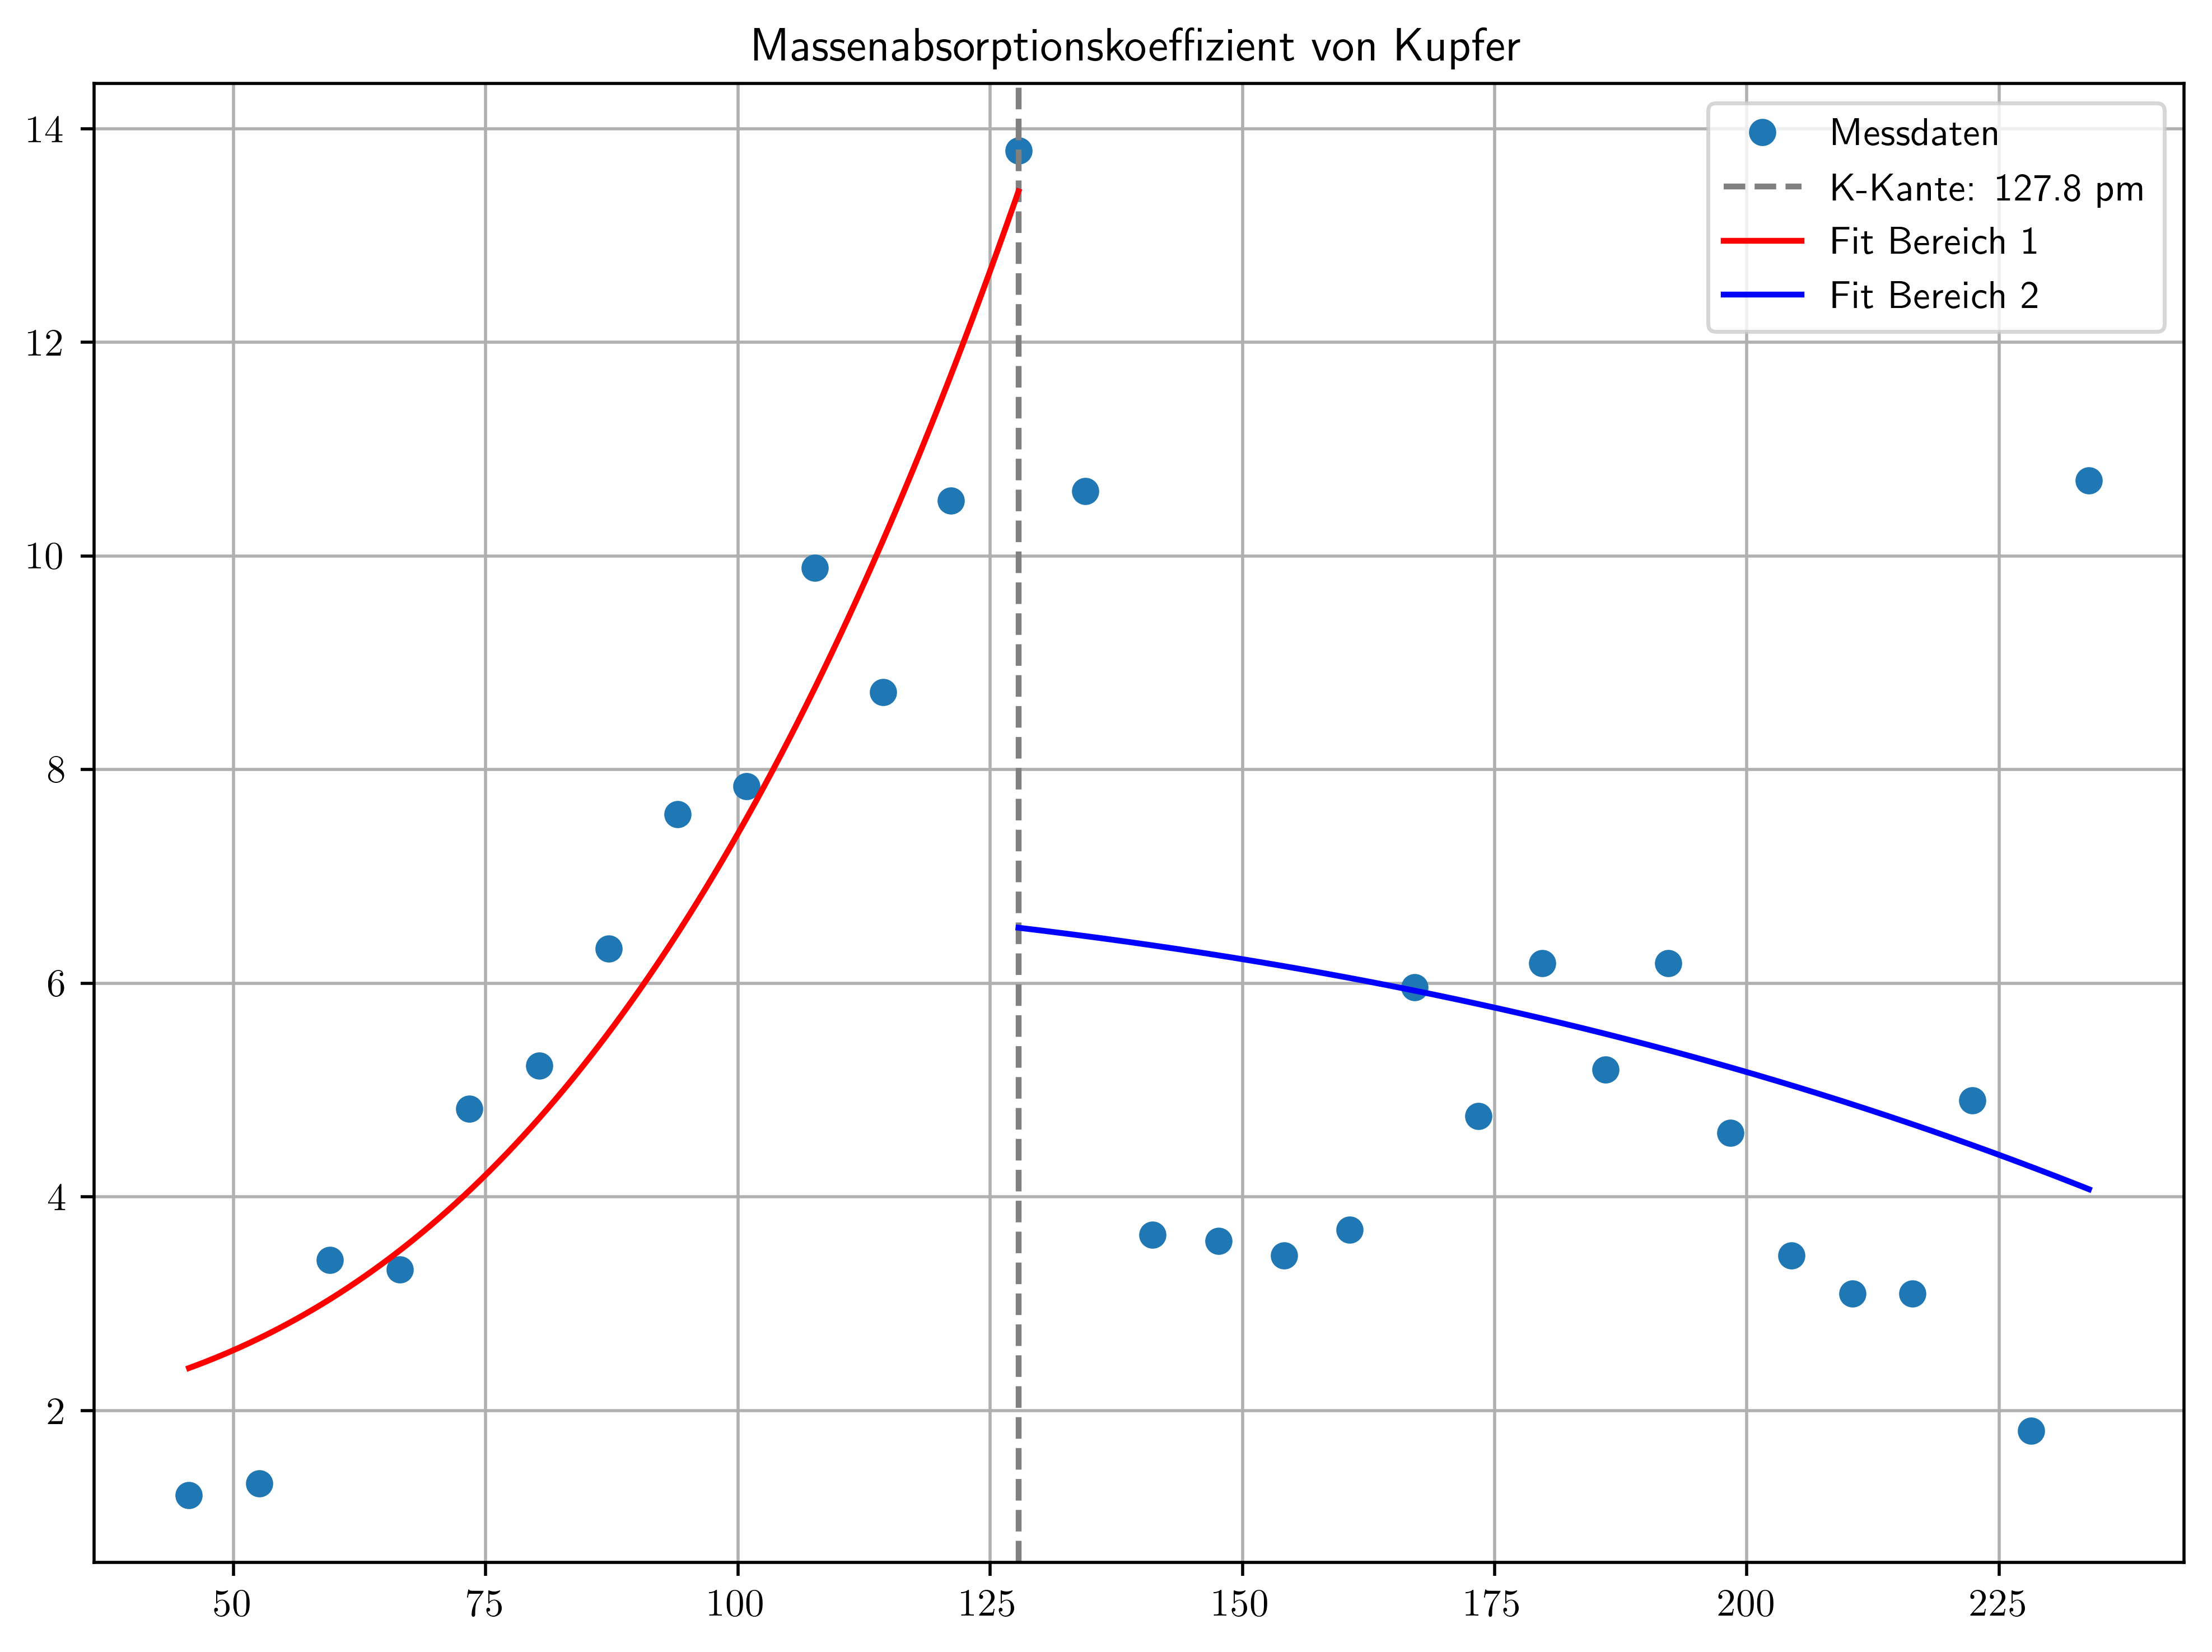


--- Auswertung für Nickel ---
Erster Bereich: a1 = 0.0406 ± 0.0012 (cm²/g)^(1/3)pm⁻¹
Zweiter Bereich: a2 = -0.0191 ± 0.0028 (cm²/g)^(1/3)pm⁻¹
K-Kante bei λ = 127.8 ± 0.0 pm
Energie K-Schale E_K = 9.701 ± 0.000 keV


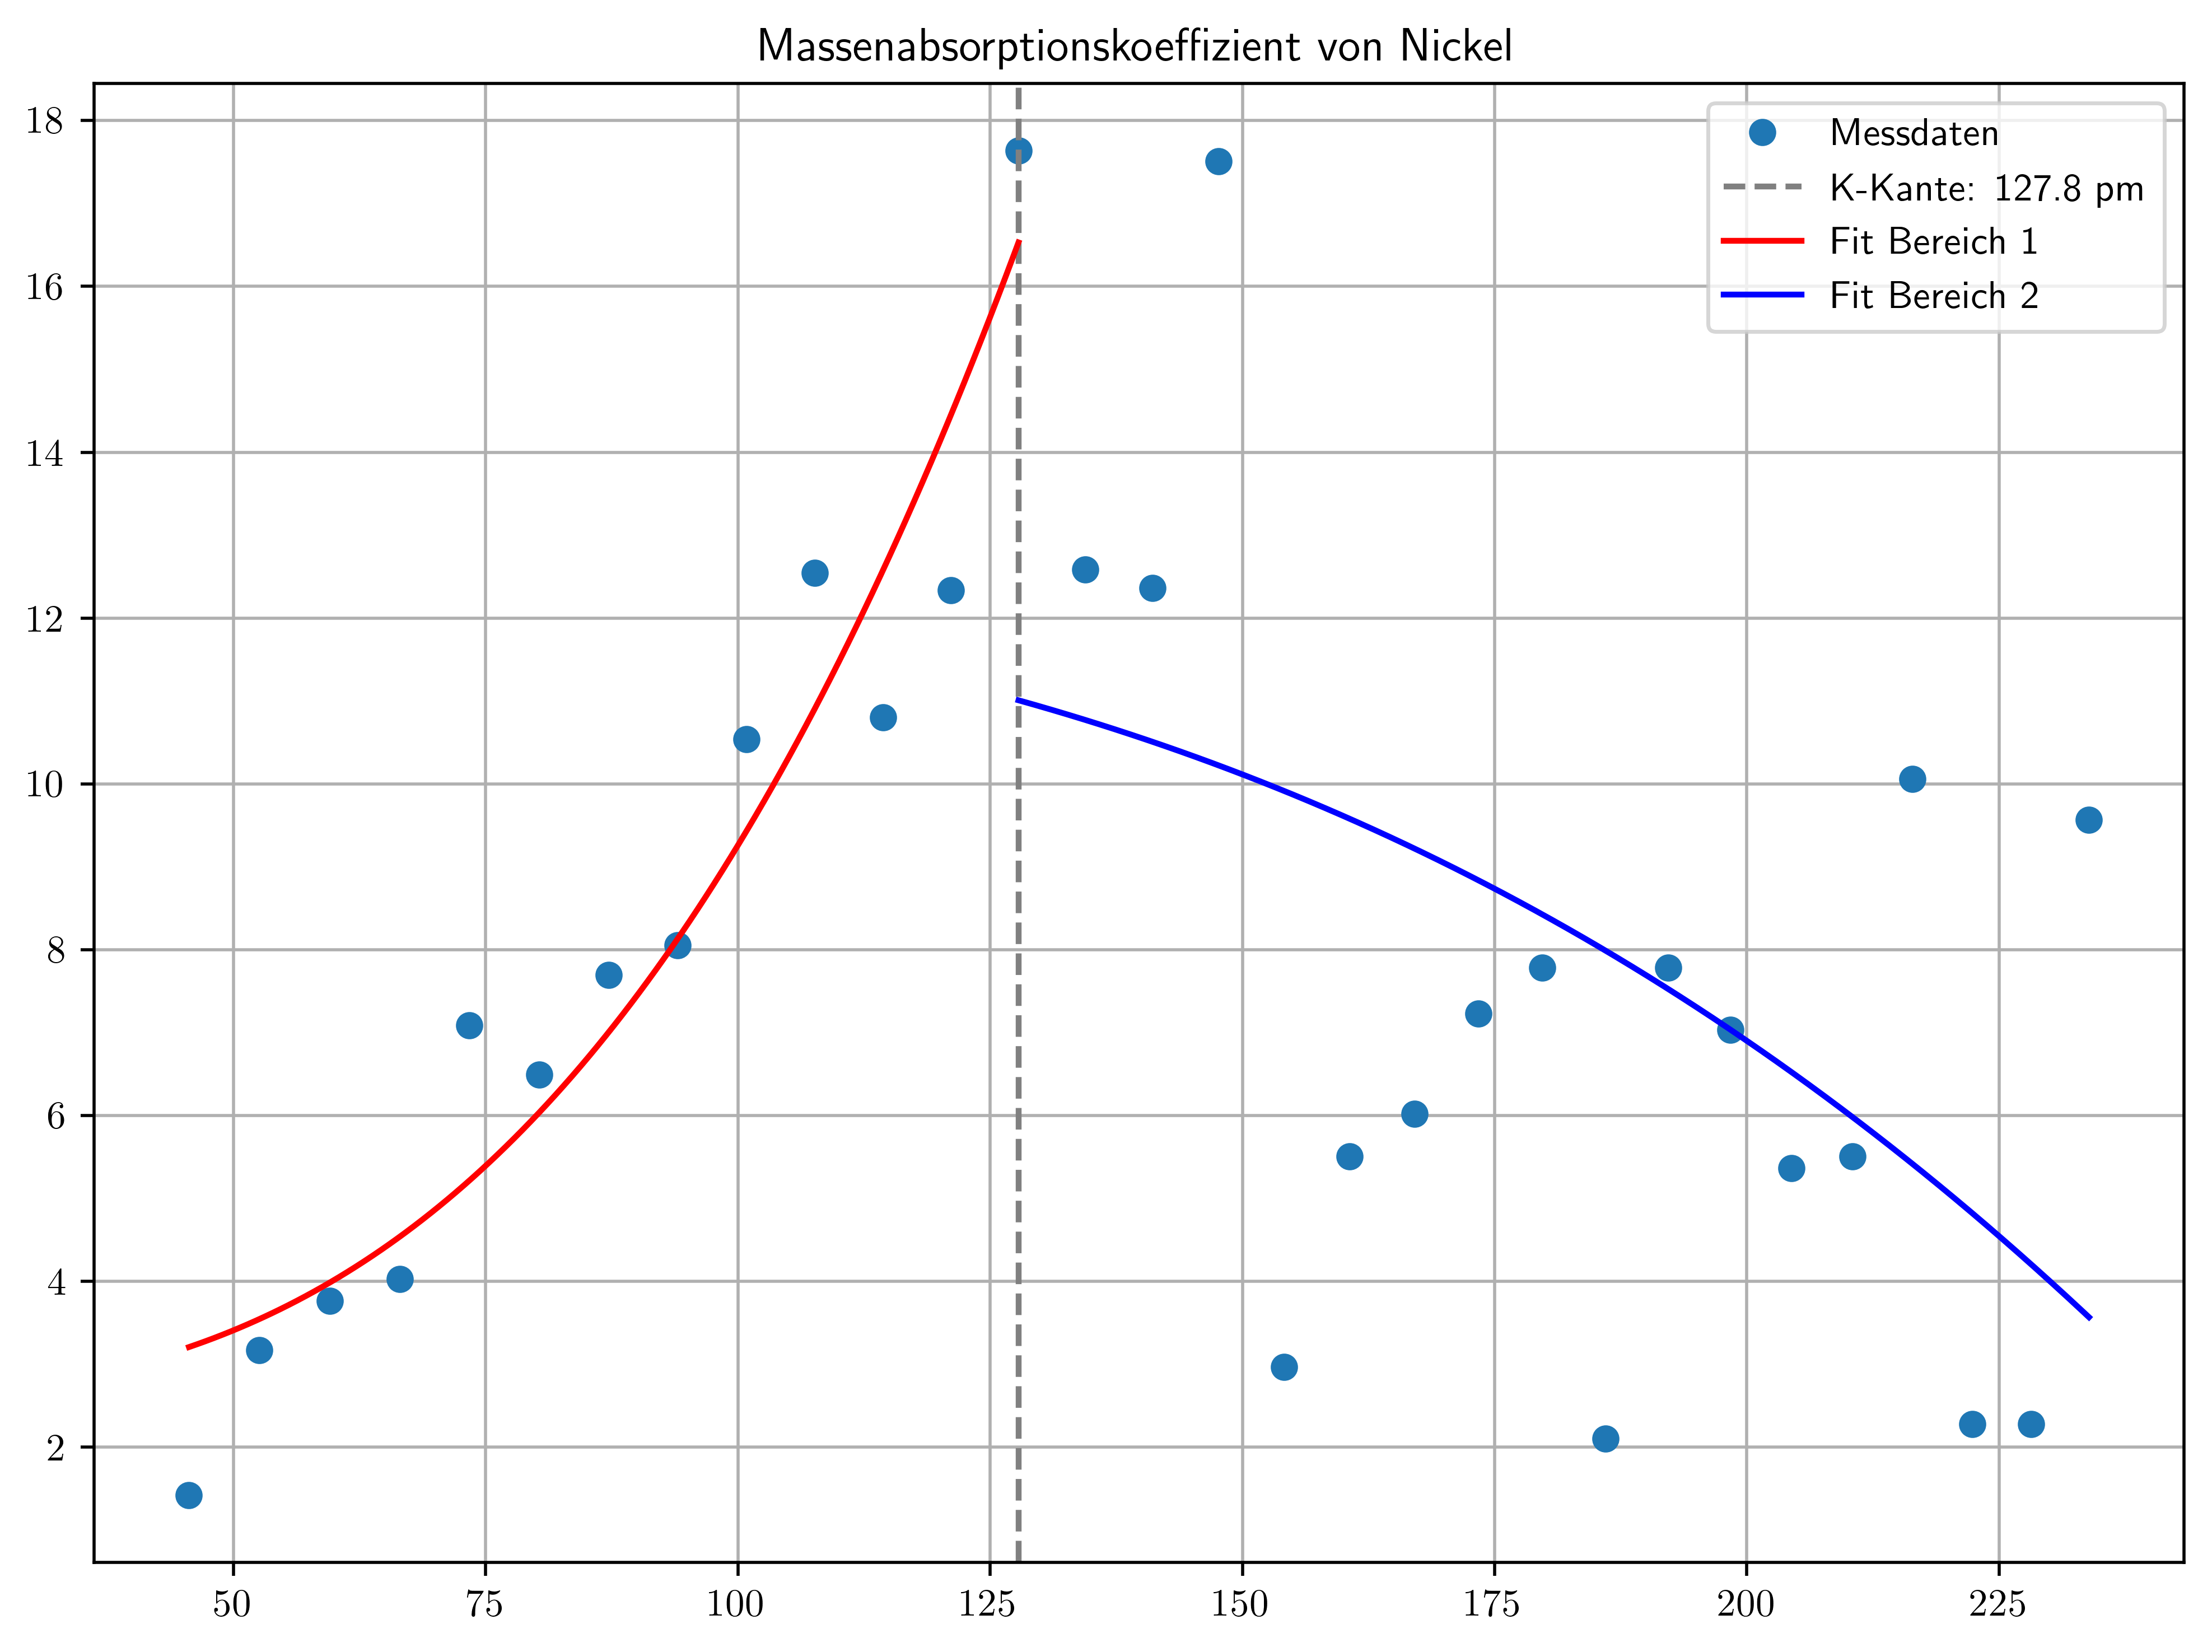

In [371]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Konstanten ---
d_LiF = 201.4e-12  # m (LiF-Gitterkonstante)
hc_pm_eV = 1.23984e6  # hc in eV·pm

# --- Materialdaten ---
materials = {
    "Kupfer": {
        "filename": "Versuch4_Teil2_Cu25mikro.txt",
        "thickness_mm": 0.025,
        "density_g_cm3": 8.96
    },
    "Nickel": {
        "filename": "Versuch4_Teil2_Ni25mikro.txt",
        "thickness_mm": 0.020,
        "density_g_cm3": 8.908
    }
}

# --- Hilfsfunktionen ---
def bragg_winkel_to_wavelength(theta_deg, d):
    return 2 * d * np.sin(np.radians(theta_deg))  # in m

def absorption_coeff(I0, I, x):
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    rho_kg_m3 = rho * 1000  # g/cm³ → kg/m³
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd) ** 3 + b

# --- Referenzdaten (ohne Absorber) ---
data_ref = np.loadtxt("Versuch4_Teil2_leer.txt", skiprows=3)
angle_ref = data_ref[:, 0]
counts_ref = data_ref[:, 1]

for material, props in materials.items():
    print(f"\n--- Auswertung für {material} ---")
    
    # Messdaten laden
    data = np.loadtxt(props["filename"], skiprows=3)
    angle = data[:, 0]
    counts = data[:, 1]

    # Winkel prüfen
    assert np.allclose(angle, angle_ref), f"Winkel stimmen bei {material} nicht überein"

    thickness_m = props["thickness_mm"] * 1e-3
    rho = props["density_g_cm3"]
    wavelengths = bragg_winkel_to_wavelength(angle, d_LiF) * 1e12  # pm

    mask = (counts > 0) & (counts_ref > 0) & (counts < counts_ref)
    wl = wavelengths[mask]
    I0 = counts_ref[mask]
    I = counts[mask]

    mu = absorption_coeff(I0, I, thickness_m)
    mu_rho = mass_abs_coeff(mu, rho)

    # Index des höchsten Werts (Kante) finden
    max_index = np.argmax(mu_rho)

    # Bereich links vom Kante (inklusive max_index)
    wl_left = wl[:max_index + 1]
    mu_rho_left = mu_rho[:max_index + 1]

    # Bereich rechts vom Kante (inklusive max_index)
    wl_right = wl[max_index:]
    mu_rho_right = mu_rho[max_index:]

    # Beide Bereiche fitten
    popt_left, pcov_left = curve_fit(fit_function, wl_left, mu_rho_left)
    a1, b1 = popt_left
    a1_err = np.sqrt(np.diag(pcov_left))[0]

    popt_right, pcov_right = curve_fit(fit_function, wl_right, mu_rho_right)
    a2, b2 = popt_right
    a2_err = np.sqrt(np.diag(pcov_right))[0]

    # K-Kante Wellenlänge: Mittelwert zwischen letztem linken und erstem rechten Punkt
    lambda_k = (wl_left[-1] + wl_right[0]) / 2
    # Unsicherheit: halbe Differenz (Halb-Schrittweite)
    delta_lambda_k = (wl_right[0] - wl_left[-1]) / 2

    # Energie K-Schale und Unsicherheit (Fehlerfortpflanzung)
    E_k = hc_pm_eV / lambda_k * 1e-3  # keV
    # dE/dλ = -hc/(λ^2)
    dE_dlambda = -hc_pm_eV / (lambda_k ** 2) * 1e-3
    delta_E_k = abs(dE_dlambda) * delta_lambda_k

    # Einheitenumrechnung a: (m²/kg/pm³)^(1/3) → (cm²/g/pm³)^(1/3)
    conv_a = 10 ** (1 / 3)
    a1_conv = a1 * conv_a
    a1_err_conv = a1_err * conv_a
    a2_conv = a2 * conv_a
    a2_err_conv = a2_err * conv_a

    print(f"Erster Bereich: a1 = {a1_conv:.4f} ± {a1_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
    print(f"Zweiter Bereich: a2 = {a2_conv:.4f} ± {a2_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
    print(f"K-Kante bei λ = {lambda_k:.1f} ± {delta_lambda_k:.1f} pm")
    print(f"Energie K-Schale E_K = {E_k:.3f} ± {delta_E_k:.3f} keV")

    # Plot mit zwei Fits und Kante
    plt.figure(figsize=(8, 6), dpi=500)
    plt.plot(wl, mu_rho, 'o', label='Messdaten')
    plt.axvline(lambda_k, color='gray', linestyle='--', label=f'K-Kante: {lambda_k:.1f} pm')

    x_fit_left = np.linspace(wl_left[0], wl_left[-1], 200)
    x_fit_right = np.linspace(wl_right[0], wl_right[-1], 200)
    plt.plot(x_fit_left, fit_function(x_fit_left, *popt_left), 'r-', label='Fit Bereich 1')
    plt.plot(x_fit_right, fit_function(x_fit_right, *popt_right), 'b-', label='Fit Bereich 2')

    #plt.xlabel("Wellenlänge λ (pm)")
    #plt.ylabel(r'$\mu/\rho$ (m²/kg)')
    plt.title(f"Massenabsorptionskoeffizient von {material}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Erster Bereich: a1 = 0.0384 ± 0.0006 (cm²/g)^(1/3)pm⁻¹
Zweiter Bereich: a2 = 0.0119 ± 0.0034 (cm²/g)^(1/3)pm⁻¹
K-Kante bei λ = 137.7 ± 9.9 pm
Energie K-Schale E_K = 9.003 ± 0.648 keV


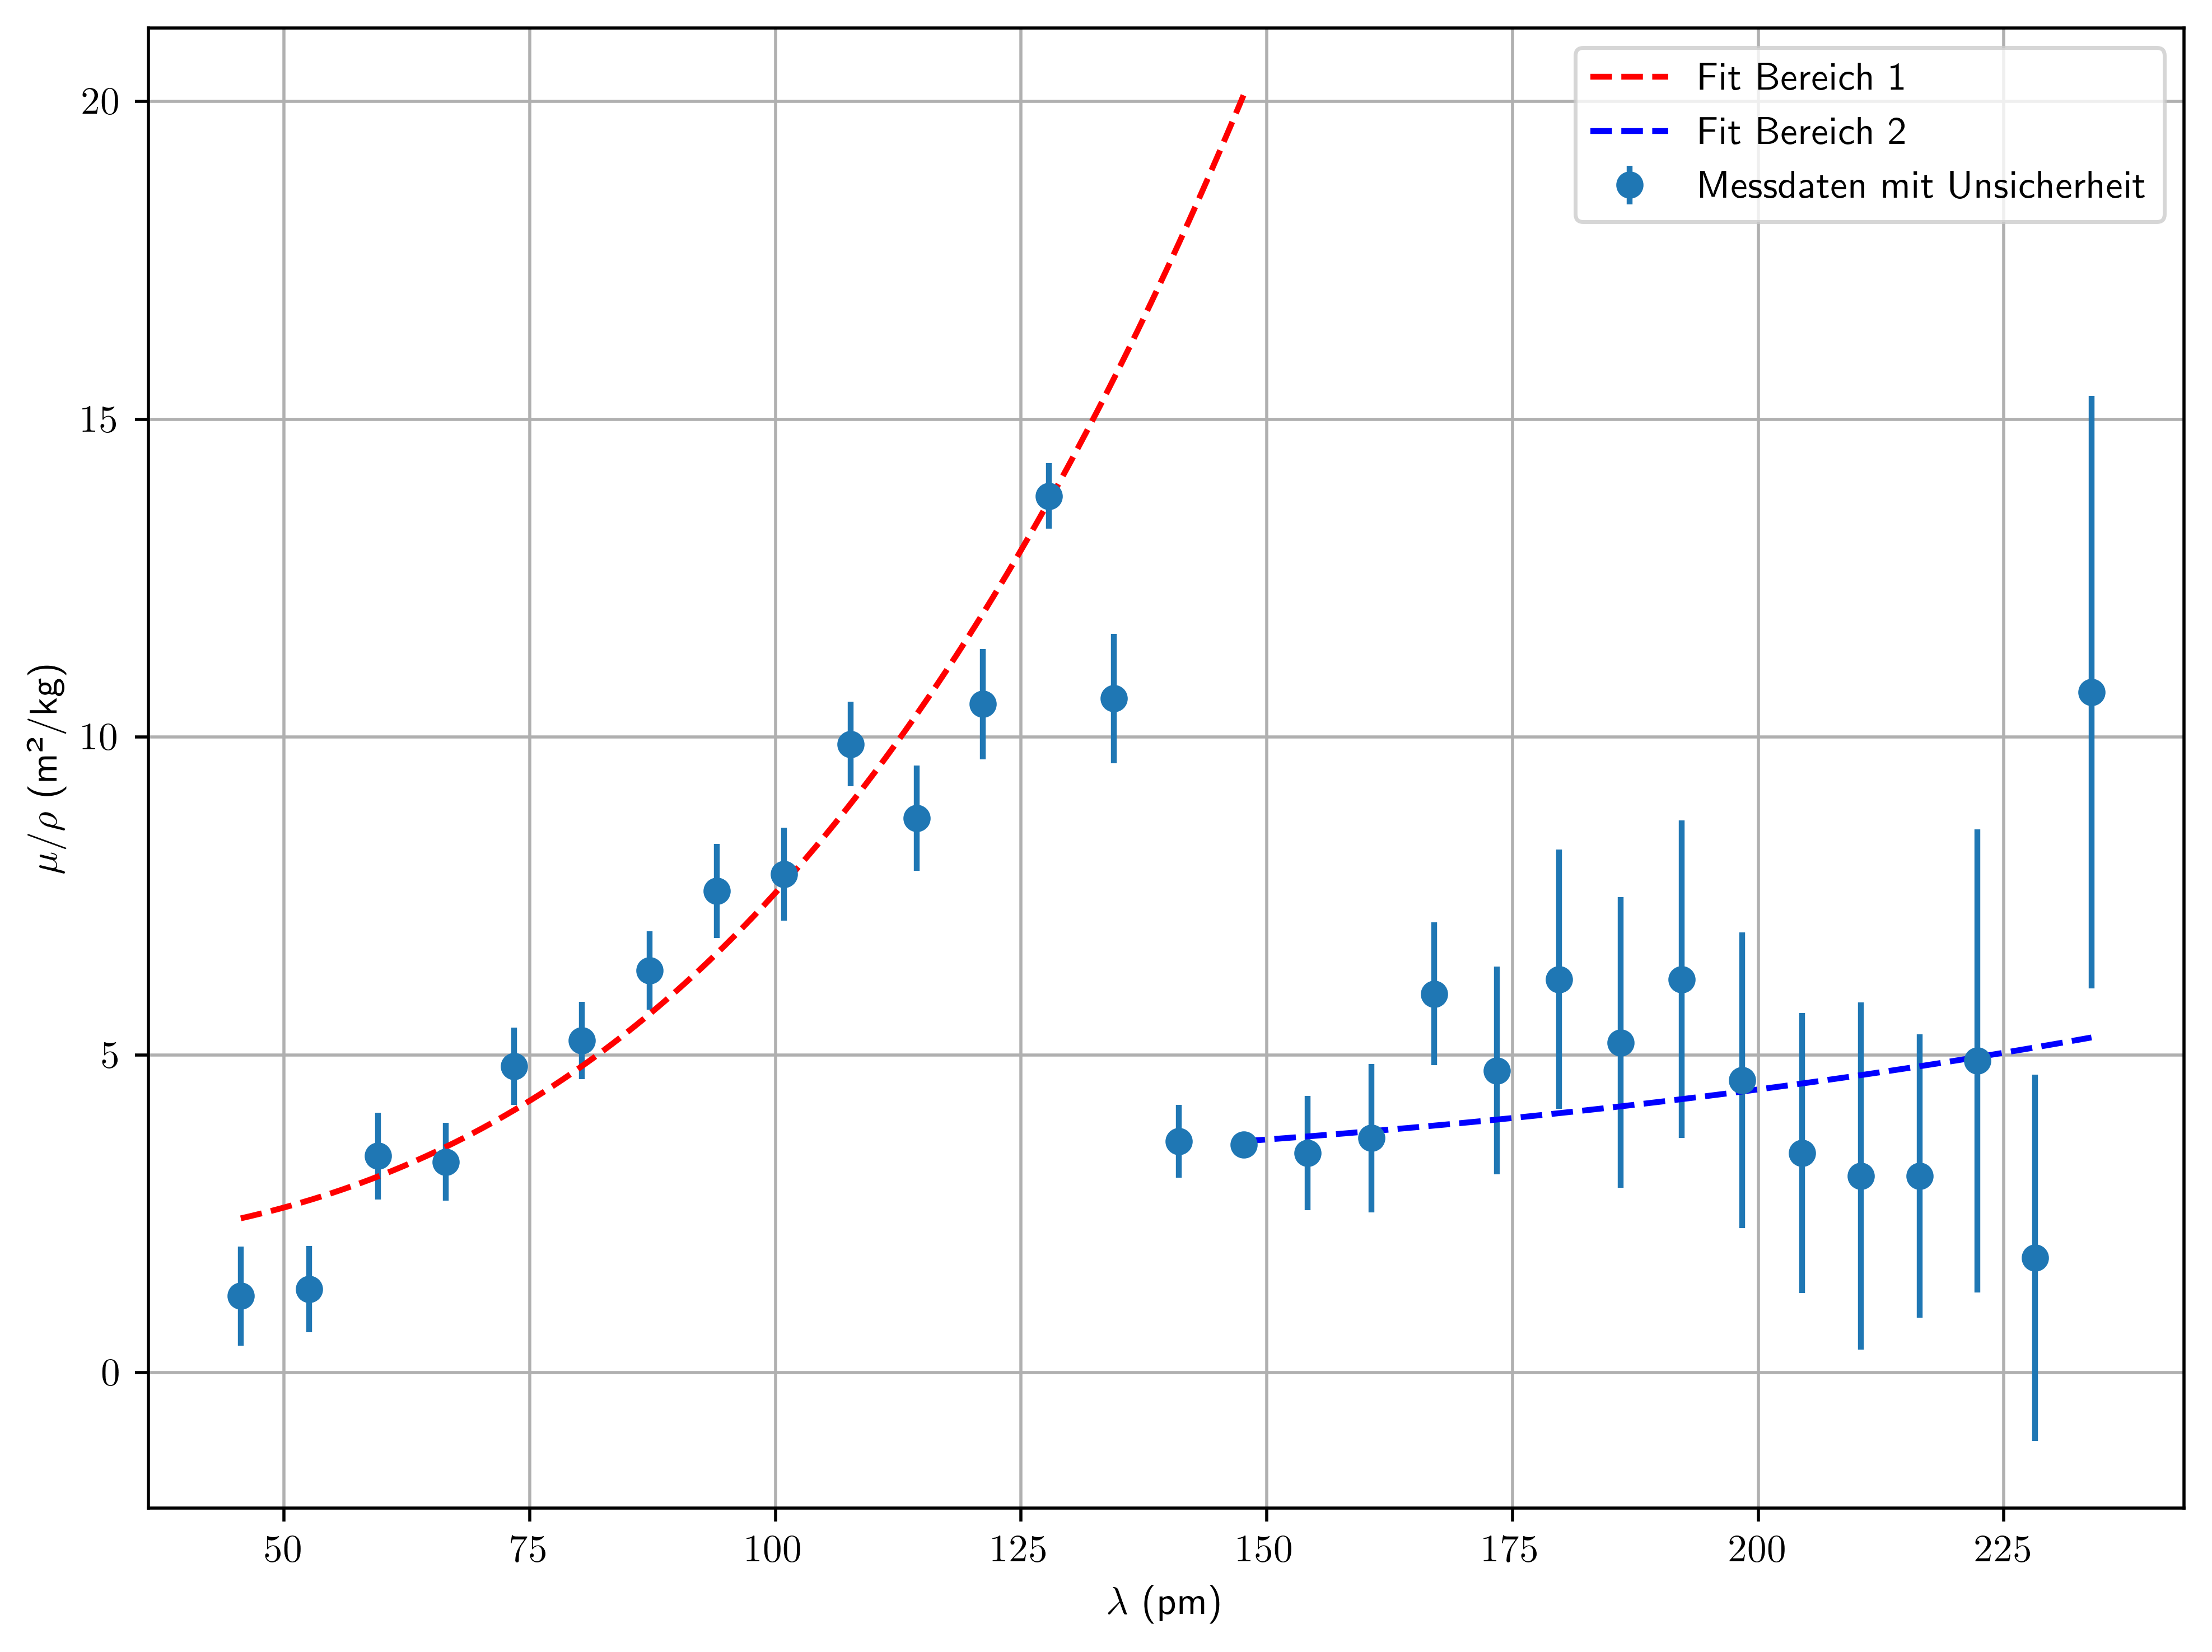

In [396]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Konstanten ---
d_LiF = 201.4e-12  # m (LiF-Gitterkonstante)
hc_pm_eV = 1.23984e6  # hc in eV·pm

# --- Kupferdaten ---
filename = "Versuch4_Teil2_Cu25mikro.txt"
thickness_mm = 0.025
density_g_cm3 = 8.96

# --- Hilfsfunktionen ---
def bragg_winkel_to_wavelength(theta_deg, d):
    return 2 * d * np.sin(np.radians(theta_deg))  # in m

def absorption_coeff(I0, I, x):
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    rho_kg_m3 = rho * 1000  # g/cm³ → kg/m³
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd) ** 3 + b

# --- Referenzdaten (ohne Absorber) ---
data_ref = np.loadtxt("Versuch4_Teil2_leer.txt", skiprows=3)
angle_ref = data_ref[:, 0]
counts_ref = data_ref[:, 1]

# --- Kupfer Messdaten ---
data = np.loadtxt(filename, skiprows=3)
angle = data[:, 0]
counts = data[:, 1]

assert np.allclose(angle, angle_ref), "Winkel stimmen nicht überein"

thickness_m = thickness_mm * 1e-3
rho = density_g_cm3
wavelengths = bragg_winkel_to_wavelength(angle, d_LiF) * 1e12  # pm

mask = (counts > 0) & (counts_ref > 0) & (counts < counts_ref)
wl = wavelengths[mask]
I0 = counts_ref[mask]
I = counts[mask]

# Unsicherheiten der Zählraten (sqrt(N))
sigma_I0 = np.sqrt(I0)
sigma_I = np.sqrt(I)

# Absorptionskoeffizient μ
mu = absorption_coeff(I0, I, thickness_m)
mu_rho = mass_abs_coeff(mu, rho)

# Fehlerfortpflanzung für μ
# Formel: μ = (1/x) * ln(I0 / I)
# Fehler σ_μ = (1/x) * sqrt( (σ_I0/I0)^2 + (σ_I/I)^2 )
sigma_mu = (1 / thickness_m) * np.sqrt( (sigma_I0 / I0)**2 + (sigma_I / I)**2 )

# Fehler für μ/ρ
sigma_mu_rho = sigma_mu / (rho * 1000)  # Umrechnung auf kg/m³ im Nenner

# Index des höchsten Werts (Kante)
max_index = np.argmax(mu_rho)

# Bereiche für Fit
wl_left = wl[:max_index + 1]
mu_rho_left = mu_rho[:max_index + 1]
sigma_left = sigma_mu_rho[:max_index + 1]

wl_right = wl[max_index+3:]
mu_rho_right = mu_rho[max_index+3:]
sigma_right = sigma_mu_rho[max_index+3:]

# Fit mit Unsicherheiten (sigma) als weights
popt_left, pcov_left = curve_fit(fit_function, wl_left, mu_rho_left, sigma=sigma_left, absolute_sigma=True)
a1, b1 = popt_left
a1_err, b1_err = np.sqrt(np.diag(pcov_left))

popt_right, pcov_right = curve_fit(fit_function, wl_right, mu_rho_right, sigma=sigma_right, absolute_sigma=True)
a2, b2 = popt_right
a2_err, b2_err = np.sqrt(np.diag(pcov_right))

# K-Kante Wellenlänge und Unsicherheit
lambda_k = (wl_left[-1] + wl_right[0]) / 2
delta_lambda_k = (wl_right[0] - wl_left[-1]) / 2  # halber Abstand zwischen Punkten

# Energie K-Schale und Fehlerfortpflanzung
E_k = hc_pm_eV / lambda_k * 1e-3  # keV
dE_dlambda = -hc_pm_eV / (lambda_k ** 2) * 1e-3
delta_E_k = abs(dE_dlambda) * delta_lambda_k

# Umrechnung der a-Werte in (cm²/g)^(1/3)pm⁻¹
conv_a = 10 ** (1 / 3)
a1_conv = a1 * conv_a
a1_err_conv = a1_err * conv_a
a2_conv = a2 * conv_a
a2_err_conv = a2_err * conv_a

print(f"Erster Bereich: a1 = {a1_conv:.4f} ± {a1_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
print(f"Zweiter Bereich: a2 = {a2_conv:.4f} ± {a2_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
print(f"K-Kante bei λ = {lambda_k:.1f} ± {delta_lambda_k:.1f} pm")
print(f"Energie K-Schale E_K = {E_k:.3f} ± {delta_E_k:.3f} keV")

# Plot mit Fehlerbalken und Fits
plt.figure(figsize=(8, 6), dpi=500)
plt.errorbar(wl, mu_rho, yerr=sigma_mu_rho, fmt='o', label='Messdaten mit Unsicherheit')
#plt.axvline(lambda_k, color='gray', linestyle='--', label=f'K-Kante: {lambda_k:.1f} pm')
#x_fit_left = np.linspace(min(wl), max(wl), 200)
x_fit_left = np.linspace(wl_left[0], wl_right[-15], 200)
x_fit_right = np.linspace(wl_right[0], wl_right[-1], 200)
plt.plot(x_fit_left, fit_function(x_fit_left, *popt_left), 'r--', label='Fit Bereich 1')
plt.plot(x_fit_right, fit_function(x_fit_right, *popt_right), 'b--', label='Fit Bereich 2')

plt.xlabel('$\lambda$ (pm)')
plt.ylabel(r"$\mu/\rho$ (m²/kg)")
#plt.title("Massenabsorptionskoeffizient von Kupfer")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Erster Bereich: a1 = 0.0381 ± 0.0007 (cm²/g)^(1/3)pm⁻¹
Zweiter Bereich: a2 = 0.0122 ± 0.0043 (cm²/g)^(1/3)pm⁻¹
K-Kante bei λ = 141.0 ± 13.2 pm
Energie K-Schale E_K = 8.795 ± 0.821 keV


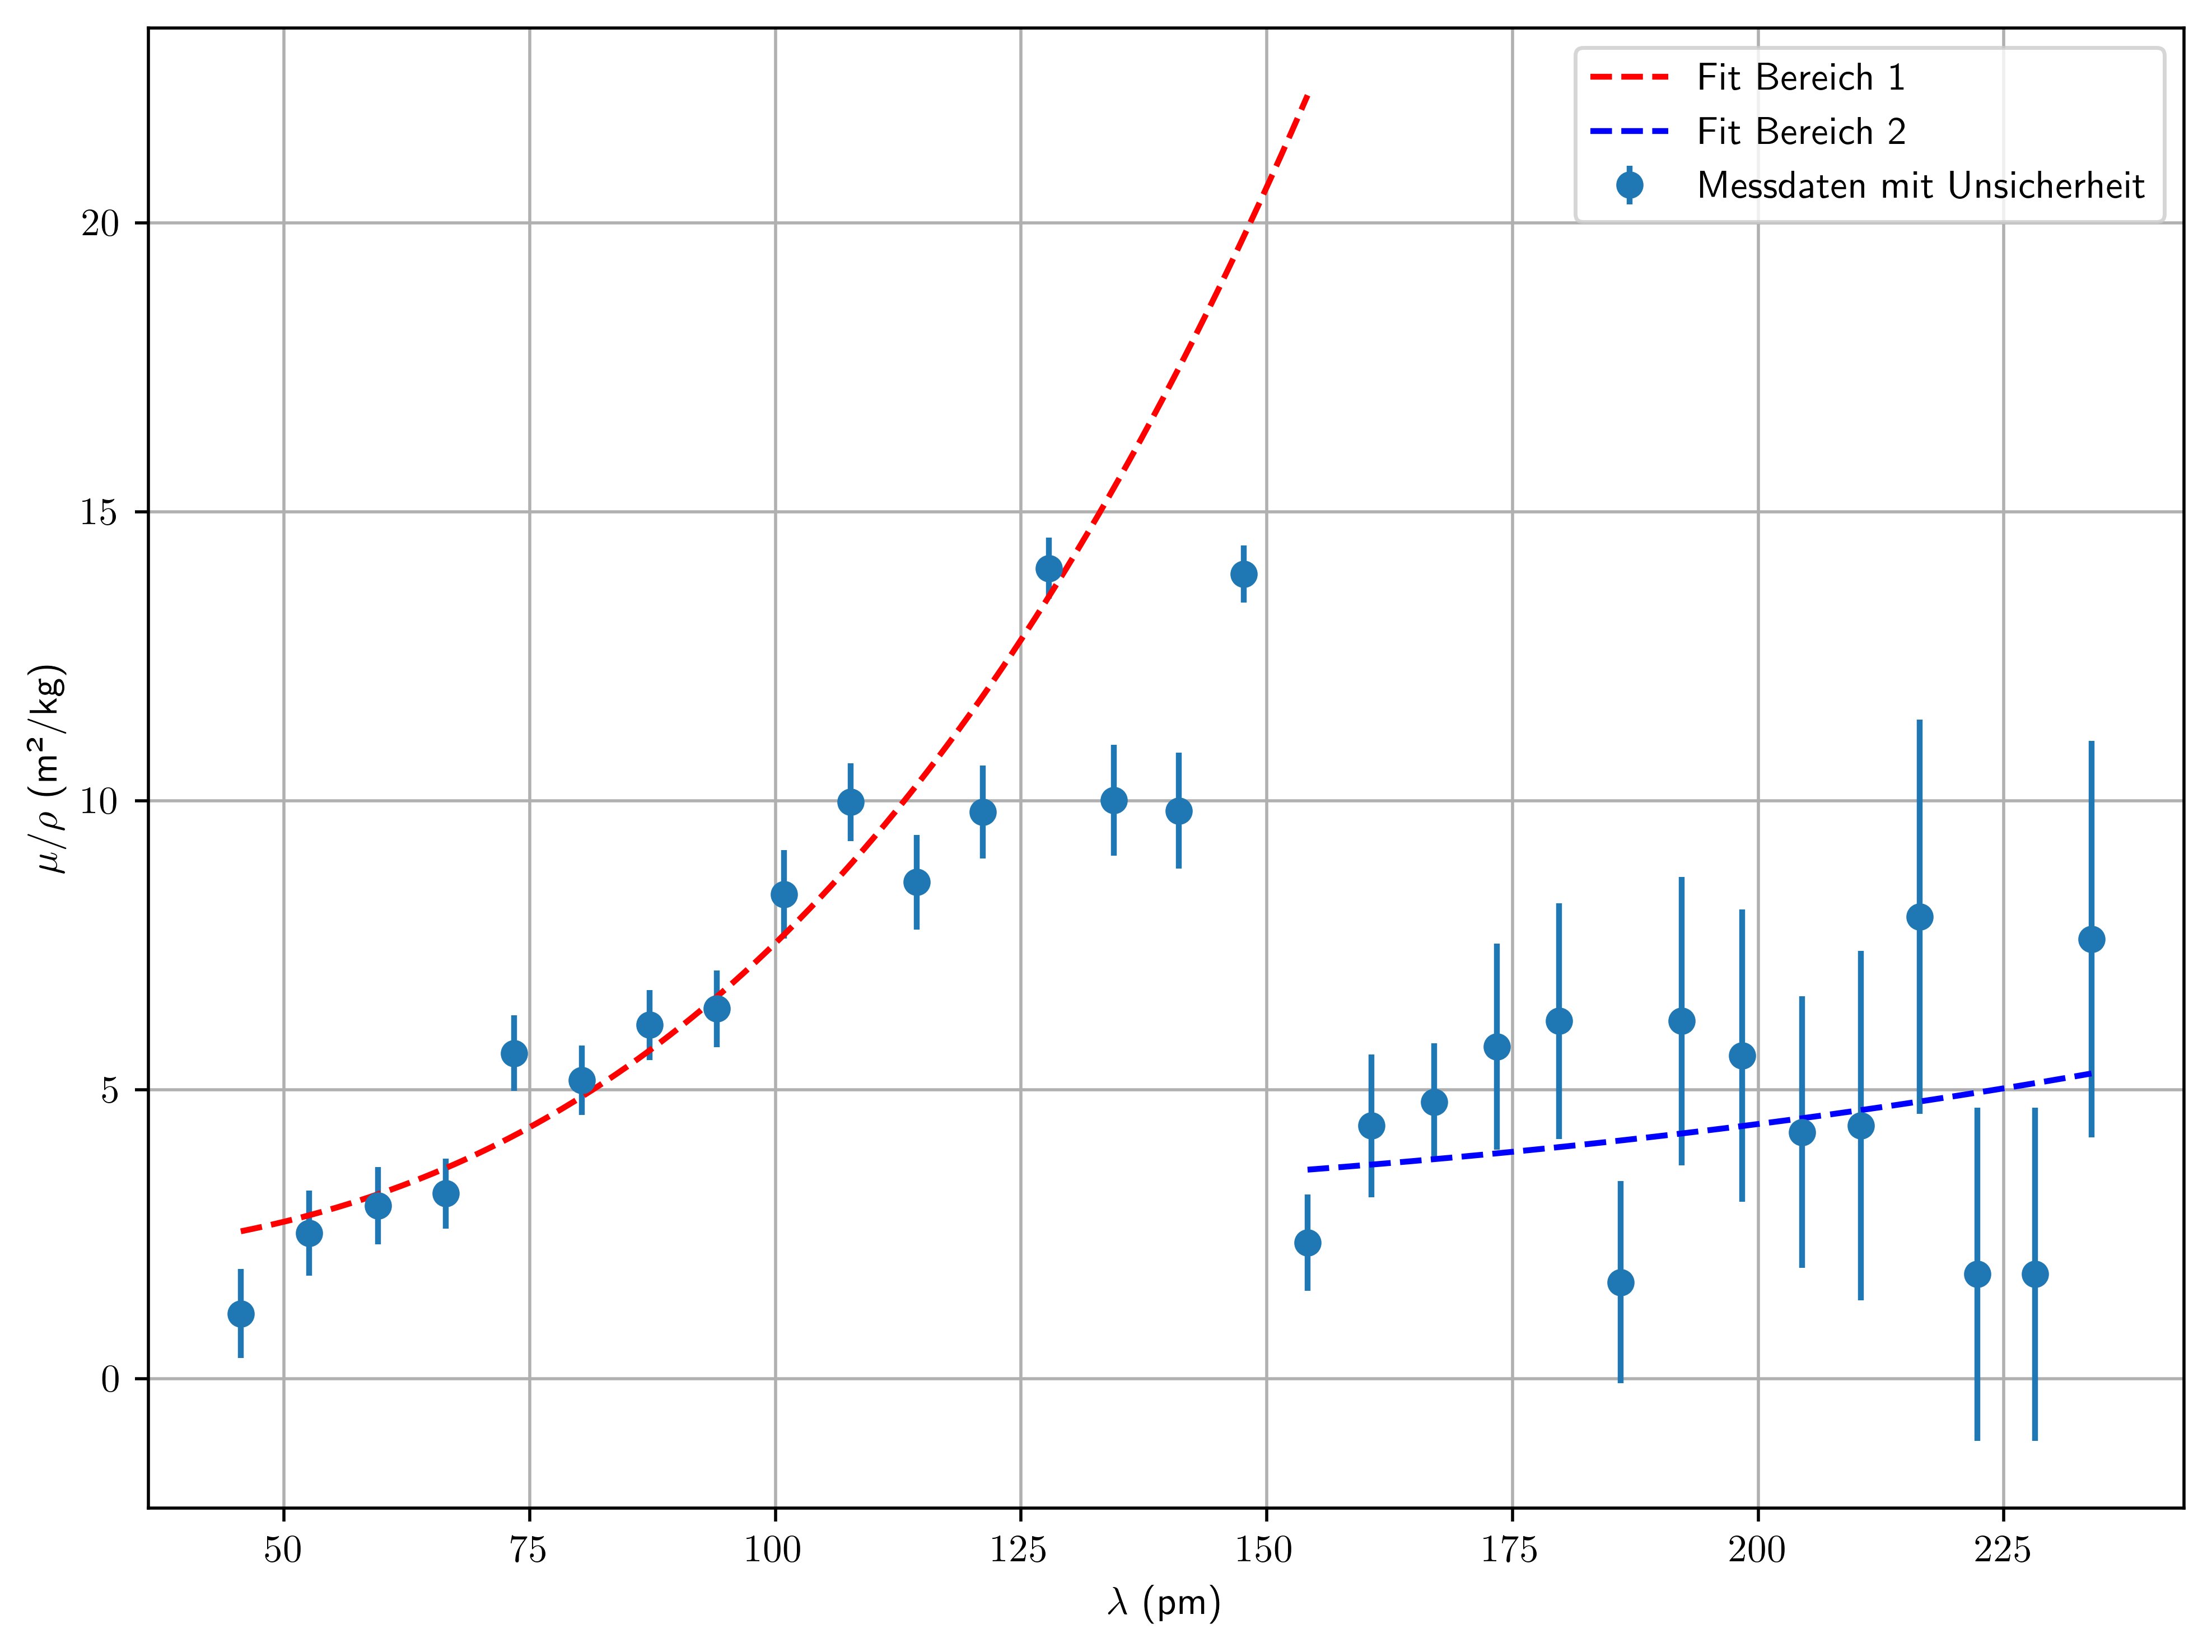

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Konstanten ---
d_LiF = 201.4e-12  # m (LiF-Gitterkonstante)
hc_pm_eV = 1.23984e6  # hc in eV·pm

# --- Kupferdaten ---
filename = "Versuch4_Teil2_Ni25mikro.txt"
thickness_mm = 0.025
density_g_cm3 = 8.96

# --- Hilfsfunktionen ---
def bragg_winkel_to_wavelength(theta_deg, d):
    return 2 * d * np.sin(np.radians(theta_deg))  # in m

def absorption_coeff(I0, I, x):
    return (1 / x) * np.log(I0 / I)

def mass_abs_coeff(mu, rho):
    rho_kg_m3 = rho * 1000  # g/cm³ → kg/m³
    return mu / rho_kg_m3

def fit_function(lmbd, a, b):
    return (a * lmbd) ** 3 + b

# --- Referenzdaten (ohne Absorber) ---
data_ref = np.loadtxt("Versuch4_Teil2_leer.txt", skiprows=3)
angle_ref = data_ref[:, 0]
counts_ref = data_ref[:, 1]

# --- Kupfer Messdaten ---
data = np.loadtxt(filename, skiprows=3)
angle = data[:, 0]
counts = data[:, 1]

assert np.allclose(angle, angle_ref), "Winkel stimmen nicht überein"

thickness_m = thickness_mm * 1e-3
rho = density_g_cm3
wavelengths = bragg_winkel_to_wavelength(angle, d_LiF) * 1e12  # pm

mask = (counts > 0) & (counts_ref > 0) & (counts < counts_ref)
wl = wavelengths[mask]
I0 = counts_ref[mask]
I = counts[mask]

# Unsicherheiten der Zählraten (sqrt(N))
sigma_I0 = np.sqrt(I0)
sigma_I = np.sqrt(I)

# Absorptionskoeffizient μ
mu = absorption_coeff(I0, I, thickness_m)
mu_rho = mass_abs_coeff(mu, rho)

# Fehlerfortpflanzung für μ
# Formel: μ = (1/x) * ln(I0 / I)
# Fehler σ_μ = (1/x) * sqrt( (σ_I0/I0)^2 + (σ_I/I)^2 )
sigma_mu = (1 / thickness_m) * np.sqrt( (sigma_I0 / I0)**2 + (sigma_I / I)**2 )

# Fehler für μ/ρ
sigma_mu_rho = sigma_mu / (rho * 1000)  # Umrechnung auf kg/m³ im Nenner

# Index des höchsten Werts (Kante)
max_index = np.argmax(mu_rho)

# Bereiche für Fit
wl_left = wl[:max_index + 1]
mu_rho_left = mu_rho[:max_index + 1]
sigma_left = sigma_mu_rho[:max_index + 1]

wl_right = wl[max_index+4:]
mu_rho_right = mu_rho[max_index+4:]
sigma_right = sigma_mu_rho[max_index+4:]

# Fit mit Unsicherheiten (sigma) als weights
popt_left, pcov_left = curve_fit(fit_function, wl_left, mu_rho_left, sigma=sigma_left, absolute_sigma=True)
a1, b1 = popt_left
a1_err, b1_err = np.sqrt(np.diag(pcov_left))

popt_right, pcov_right = curve_fit(fit_function, wl_right, mu_rho_right, sigma=sigma_right, absolute_sigma=True)
a2, b2 = popt_right
a2_err, b2_err = np.sqrt(np.diag(pcov_right))

# K-Kante Wellenlänge und Unsicherheit
lambda_k = (wl_left[-1] + wl_right[0]) / 2
delta_lambda_k = (wl_right[0] - wl_left[-1]) / 2  # halber Abstand zwischen Punkten

# Energie K-Schale und Fehlerfortpflanzung
E_k = hc_pm_eV / lambda_k * 1e-3  # keV
dE_dlambda = -hc_pm_eV / (lambda_k ** 2) * 1e-3
delta_E_k = abs(dE_dlambda) * delta_lambda_k

# Umrechnung der a-Werte in (cm²/g)^(1/3)pm⁻¹
conv_a = 10 ** (1 / 3)
a1_conv = a1 * conv_a
a1_err_conv = a1_err * conv_a
a2_conv = a2 * conv_a
a2_err_conv = a2_err * conv_a

print(f"Erster Bereich: a1 = {a1_conv:.4f} ± {a1_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
print(f"Zweiter Bereich: a2 = {a2_conv:.4f} ± {a2_err_conv:.4f} (cm²/g)^(1/3)pm⁻¹")
print(f"K-Kante bei λ = {lambda_k:.1f} ± {delta_lambda_k:.1f} pm")
print(f"Energie K-Schale E_K = {E_k:.3f} ± {delta_E_k:.3f} keV")

# Plot mit Fehlerbalken und Fits
plt.figure(figsize=(8, 6), dpi=500)
plt.errorbar(wl, mu_rho, yerr=sigma_mu_rho, fmt='o', label='Messdaten mit Unsicherheit')
#plt.axvline(lambda_k, color='gray', linestyle='--', label=f'K-Kante: {lambda_k:.1f} pm')
#x_fit_left = np.linspace(min(wl), max(wl), 200)
x_fit_left = np.linspace(wl_left[0], wl_right[-14], 200)
x_fit_right = np.linspace(wl_right[0], wl_right[-1], 200)
plt.plot(x_fit_left, fit_function(x_fit_left, *popt_left), 'r--', label='Fit Bereich 1')
plt.plot(x_fit_right, fit_function(x_fit_right, *popt_right), 'b--', label='Fit Bereich 2')

plt.xlabel('$\lambda$ (pm)')
plt.ylabel(r"$\mu/\rho$ (m²/kg)")
#plt.title("Massenabsorptionskoeffizient von Kupfer")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
